Version 2025.01.18 - A. Lundervold (BMED365-2025)

### 06-TabPFN-explore.ipynb

(Modified from [TabPFN Demo V1 Local](https://colab.research.google.com/drive/1SHa43VuHASLjevzO7y3-wPCxHY18-2H6?usp=sharing), using `bmed365-cuda` conda environment or Google Colab)

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/BMED365-2025/blob/main/Lab2-DL/notebooks/06-TabPFN-explore.ipynb)

### TabPFN: A Revolutionary Approach to Analyzing Small Medical Datasets using Deep Learning

### Key Points for Medical Students

#### What is TabPFN?
- A new machine learning model specifically designed for analyzing small-to-medium sized tabular datasets (up to 10,000 samples)
- Particularly relevant for medical research where large datasets are often unavailable
- Outperforms traditional methods like XGBoost and CatBoost with significantly less training time

#### Why is it Important for Medicine?
1. **Speed and Efficiency**
   - Can analyze data in seconds rather than hours
   - No need for extensive hyperparameter tuning
   - Perfect for rapid clinical research and analysis

2. **Small Dataset Capability**
   - Excels with limited data (common in medical research)
   - Maintains high accuracy even with small sample sizes
   - Particularly useful for rare disease studies or pilot research

3. **Key Features Relevant to Medical Research**
   - Handles missing data effectively
   - Works well with both categorical and numerical data
   - Built-in uncertainty estimation
   - Can detect outliers and anomalies
   - Provides interpretable results

#### Practical Applications in Medicine
1. **Clinical Decision Support**
   - Risk prediction models
   - Patient outcome prediction
   - Treatment response analysis

2. **Medical Research**
   - Biomedical risk models
   - Drug discovery
   - Clinical trial data analysis
   - Patient stratification

3. **Data Analysis**
   - Handles common medical data challenges
   - Works with mixed data types (lab values, patient demographics, etc.)
   - Can process both structured and categorical medical data

#### Advantages Over Traditional Methods
- Faster analysis (2.8s vs. 4 hours for traditional methods)
- Better performance on small datasets
- More robust to missing data
- Built-in uncertainty estimation
- No need for extensive data preprocessing



### Traditional Deep Learning vs TabPFN's Approach

#### Traditional Challenges
- Deep learning has historically struggled with tabular data
- Neural networks typically perform poorly compared to tree-based methods (like XGBoost)
- Usually requires large datasets to be effective

#### TabPFN's Novel Solution
1. **Innovative Architecture**
   - Uses a modified transformer architecture
   - Specifically designed for tabular data
   - Treats each cell in the table as a separate representation
   - Combines feature and sample attention mechanisms

2. **Pre-training Strategy**
   - Pre-trained on millions of synthetic datasets
   - Uses in-context learning (ICL), similar to large language models
   - Learns to understand relationships in tabular data
   - No need for traditional gradient-based training on new datasets

### Key Deep Learning Components

#### Architecture Details
- Two-way attention mechanism:
  - Attention across features in each row
  - Attention across samples for each feature
- Memory-efficient design
- Optimized for small-to-medium datasets
- Can handle up to 10,000 samples and 500 features

#### Training Innovation
1. **Synthetic Data Training**
   - Trained on ~130 million synthetic datasets
   - Uses structural causal models
   - Learns general patterns and relationships
   - No need for real-world data in pre-training

2. **In-Context Learning**
   - Similar to modern language models
   - Can adapt to new datasets without traditional training
   - Single forward pass prediction
   - No fine-tuning required for new tasks

### Advantages Over Traditional Deep Learning

1. **Performance**
   - Better results than standard neural networks
   - Competitive with or superior to tree-based methods
   - Works well with limited data

2. **Efficiency**
   - No need for dataset-specific training
   - Fast inference time
   - Lower computational requirements
   - GPU acceleration optional but not required

3. **Practicality**
   - Handles missing values automatically
   - Works with mixed data types
   - Built-in uncertainty estimation
   - More interpretable than traditional deep learning

### Impact
This approach represents a significant shift in how deep learning can be applied to tabular data, making it more practical and effective for real-world applications, particularly in fields like healthcare where data is often limited but structured.

## TabPFN exploration

Welcome to the hands-on Colab notebook for TabPFN!
This code shows how to locally (with GPU support) install and run TabPFN. For fast inference with additional features use **[TabPFN client](https://tinyurl.com/tabpfn-colab-online)**.

**Installation**
* First, copy the notebook to be able to modify it.
* Then, run the cells in the installation block, this should
be good enough!

---

> 🔵 **Hint** <br>
We recommend first enabling the **Table of Contents** with the `☰` icon in the top left and collapsing all sections by selecting all cells `Ctrl + Shift + A` and then pressing `Ctrl + ]`.

---

Thank you to [Lennart Purucker](https://github.com/LennartPurucker) for providing the original version of this notebook!

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


# Installation

Restart your runtime and rerun the *cell*, if Colab asks for it.

In [2]:
if is_colab:
    # Install sklearn
    #!pip install scikit-learn==1.5.2

    # Install TorchGeometric
    !pip install torch-geometric

    # Install TabPFN
    !pip install tabpfn

    # TabPFN Extensions installs optional functionalities around the TabPFN model
    # These include post-hoc ensembles, interpretability tools, and more
    !git clone https://github.com/PriorLabs/tabpfn-extensions
    !pip install -e tabpfn-extensions
    !pip install tabpfn-extensions

    # Install hyperopt library for hyperparameter optimization
    !pip install hyperopt

    # Install Baselines
    !pip install catboost xgboost

    # Install example datasets
    !pip install datasets
else:
    print("This code is not running in Colab.")


This code is not running in Colab.


**Now Restart the Runtime**

### Necessary Imports for the Notebook

The examples in this notebook require the following imports.
Make sure to run this cell before any other cell.




#### In order to get the fastest predictions you need to enable GPUs for the notebook:
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

In [3]:
import os
import requests
from io import StringIO
from urllib.error import URLError  # Add this import

# Setup Imports
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

import torch
import torch_geometric
import shap

from tabpfn import TabPFNClassifier, TabPFNRegressor

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')

In [4]:
print("torch:", torch.__version__)
print("torch_geometric:", torch_geometric.__version__)
print("shap:", shap.__version__)
print("torch.cuda.is_available():", torch.cuda.is_available())
print("torch.cuda.get_device_name(0):", torch.cuda.get_device_name(0))
print("torch.cuda.get_device_properties(0):", torch.cuda.get_device_properties(0))

torch: 2.5.1
torch_geometric: 2.6.1
shap: 0.46.0
torch.cuda.is_available(): True
torch.cuda.get_device_name(0): Quadro RTX 6000
torch.cuda.get_device_properties(0): _CudaDeviceProperties(name='Quadro RTX 6000', major=7, minor=5, total_memory=24190MB, multi_processor_count=72, uuid=e1947619-d6af-4100-3bcc-914868e19f5b, L2_cache_size=6MB)


# Predicting with TabPFN

For our first example, we will use the client to predict on [toy data from scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

## Classification

We now compare the classification performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on the toy data from scikit-learn.

We measure classification performance using [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) (see also [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)). These toy datasets are simple to solve, so the ROC AUC will be very high.

In [5]:
def load_dataset(dataset_name='breast_cancer', fallback='iris'):
    """
    Load a dataset with fallback option if OpenML fails
    
    Parameters:
    -----------
    dataset_name : str
        Name of OpenML dataset to try first
    fallback : str
        Name of sklearn built-in dataset to use as fallback
        Options: 'iris', 'breast_cancer', 'diabetes'
        
    Returns:
    --------
    X : array-like
        Features
    y : array-like 
        Target variable
    """
    try:
        # Try OpenML first
        df = fetch_openml(dataset_name)
        return df.data, df.target
        
    except (URLError, TimeoutError) as e:
        print(f"Error fetching {dataset_name} from OpenML: {e}")
        print(f"Using sklearn's built-in {fallback} dataset instead...")
        
        # Fallback to sklearn built-in dataset
        if fallback == 'breast_cancer':
            from sklearn.datasets import load_breast_cancer
            data = load_breast_cancer()
        elif fallback == 'diabetes':
            from sklearn.datasets import load_diabetes 
            data = load_diabetes()
        elif fallback == 'iris':
            from sklearn.datasets import load_iris
            data = load_iris()
        else:
            raise ValueError(f"Unknown fallback dataset: {fallback}. Choose from: 'iris', 'breast_cancer', 'diabetes'")
            
        return data.data, data.target

In [6]:
# Import the Parkinson's dataset from sklearn.datasets
from sklearn.datasets import make_classification

def create_parkinsons_dataset():
    """
    Create a synthetic Parkinson's-like dataset since scikit-learn doesn't have 
    the real Parkinson's dataset built-in.
    
    Returns:
    --------
    X : array-like of shape (n_samples, n_features)
        The input samples.
    y : array-like of shape (n_samples,)
        The target values (0 for healthy, 1 for Parkinson's).
    """
    # Create synthetic data with similar properties to Parkinson's dataset
    # (195 samples, 22 features, binary classification)
    X, y = make_classification(
        n_samples=195,
        n_features=22,
        n_redundant=0,
        n_informative=15,
        random_state=42,
        n_clusters_per_class=2,
        class_sep=0.8
    )
    return X, y

# Load data
try:
    # First try the synthetic Parkinson's dataset
    X, y = create_parkinsons_dataset()
    dataset_name = "Synthetic Parkinson's"
except:
    # If that fails, fall back to iris dataset
    print("Using iris dataset as fallback...")
    from sklearn.datasets import load_iris
    data = load_iris()
    X, y = data.data, data.target
    dataset_name = "Iris"

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset info
print(f"Dataset: {dataset_name}")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset: Synthetic Parkinson's
Dataset shape: (195, 22)
Number of classes: 2


In [7]:
def load_parkinsons_data(fallback_to_breast_cancer=True):
   """
   Download and prepare the Parkinson's Disease dataset from UCI repository.
   
   Parameters:
   -----------
   fallback_to_breast_cancer : bool, default=True
       If True, falls back to breast cancer dataset if Parkinson's data cannot be loaded.
       
   Returns:
   --------
   X : pandas.DataFrame
       Feature matrix
   y : pandas.Series
       Target vector
   dataset_name : str
       Name of the actually loaded dataset ('parkinsons' or 'breast_cancer')
   """
   
   url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
   
   try:
       # Download data with increased timeout
       response = requests.get(url, timeout=30)
       response.raise_for_status()
       
       # Read the CSV data
       df = pd.read_csv(StringIO(response.text))
       
       # Prepare features (X) and target (y)
       X = df.drop(['name', 'status'], axis=1)
       y = df['status']
       
       print("Successfully loaded Parkinson's dataset")
       print(f"Dataset shape: {X.shape}")
       print("\nFeatures:", ', '.join(X.columns))
       print(f"\nClass distribution:\n{y.value_counts(normalize=True).round(3)}")
       
       return X, y, 'parkinsons'

   except (requests.exceptions.RequestException, pd.errors.EmptyDataError) as e:
       print(f"Error downloading/processing Parkinson's data: {e}")
       
       if not fallback_to_breast_cancer:
           raise e
           
       print("Falling back to breast cancer dataset...")
       
       # Fallback to breast cancer dataset
       data = load_breast_cancer()
       X = pd.DataFrame(data.data, columns=data.feature_names)
       y = pd.Series(data.target)
       
       print(f"\nLoaded breast cancer dataset instead")
       print(f"Dataset shape: {X.shape}")
       print(f"Features: {', '.join(data.feature_names)}")
       print(f"\nClass distribution:\n{pd.Series(y).value_counts(normalize=True).round(3)}")
       
       return X, y, 'breast_cancer'

# Example usage:
if __name__ == "__main__":
   import pandas as pd
   from sklearn.datasets import load_breast_cancer
   from sklearn.model_selection import train_test_split
   
   # Load the data
   #X, y, dataset_name = load_parkinsons_data()
   
   # Split the data
   #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
   print(f"\nLoaded {dataset_name} dataset")
   #print("\nData split complete:")
   #print(f"Training set shape: {X_train.shape}")
   #print(f"Test set shape: {X_test.shape}")


Loaded Synthetic Parkinson's dataset


In [8]:
# Explain the data and show examples

# Print dataset info
print(f"Dataset: {dataset_name}")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Since X is a numpy array, we can't access columns directly
# Instead, we can create generic feature names if needed
feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]
print("\nFeature names:")
print(feature_names)

Dataset: Synthetic Parkinson's
Dataset shape: (195, 22)
Number of classes: 2
Training set shape: (156, 22)
Test set shape: (39, 22)

Feature names:
['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20', 'Feature 21', 'Feature 22']


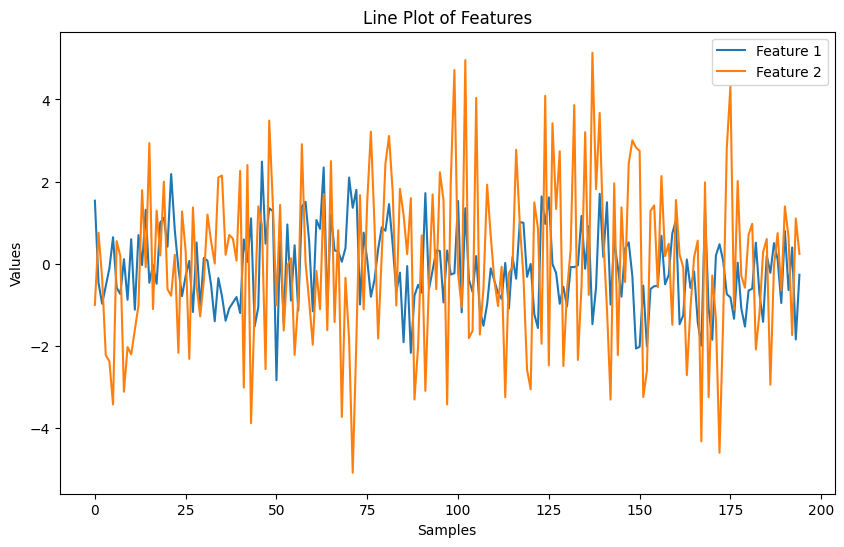

In [9]:
# Make lineplot of some data with their labels
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], label='Feature 1')
plt.plot(X[:, 1], label='Feature 2')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Line Plot of Features')
plt.legend()
plt.show()


In [10]:
X.shape

(195, 22)

In [11]:
%%time
# Parkinson's Disease dataset: Predict Parkinson's disease presence
# Features: Voice measurements (e.g., frequency, amplitude)
# Samples: 195 cases
#df = fetch_openml('parkinsons')

# Alternative datasets (commented for reference):

# German Credit Fraud (ID: 31)
# Samples: 1,000
# Features: 20 (account info, credit history, employment)
# Target: Good/Bad credit risk
# df = fetch_openml(data_id=31)

# Cholesterol dataset: Predict cholesterol levels
# Features: Patient characteristics, medical measurements
# Samples: 303 patients
# Target: Cholesterol levels in mg/dl
# df = fetch_openml('cholesterol', version=2, as_frame=True)

# Primary Tumor dataset: Predict tumor type and size
# Features: Patient symptoms, medical test results
# Samples: 339 patients
# Target: Tumor classification and size
# df = fetch_openml('primary-tumor', version=1, as_frame=True) - too many classes!

# Heart Disease dataset (Statlog): Predict presence of heart disease
# Features: Clinical and test measurements
# Samples: 270 patients
# Target: Binary heart disease diagnosis
# df = fetch_openml("heart-statlog", version=1)

# Diabetes dataset: Predict diabetes presence
# Features: Medical measurements, patient history
# Samples: 768 patients
# Target: Binary diabetes diagnosis
#df = fetch_openml("diabetes", version=1)

# Hypothyroid dataset: Predict thyroid condition
# Features: Blood test results, patient symptoms
# Samples: 3772 patients
# Target: Thyroid condition classification
# df = fetch_openml('hypothyroid')

# X, y = df.data, df.target

# Load data with iris as fallback
#X, y = load_dataset('parkinsons', fallback='iris')
X, y, dataset_name = load_parkinsons_data()

# Encode target labels to classes (not needed for iris as it's already encoded)
if not isinstance(y[0], (int, np.integer)):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Convert all categorical columns to numeric (not needed for iris as it's already numeric)
if isinstance(X, pd.DataFrame):
    for col in X.select_dtypes(['category']).columns:
        X[col] = X[col].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset info
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
if isinstance(X, pd.DataFrame):
    print("\nFeature names:")
    print(X.columns.tolist())

Successfully loaded Parkinson's dataset
Dataset shape: (195, 22)

Features: MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2, D2, PPE

Class distribution:
status
1    0.754
0    0.246
Name: proportion, dtype: float64
Dataset shape: (195, 22)
Number of classes: 2
Training set shape: (156, 22)
Test set shape: (39, 22)

Feature names:
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
CPU times: user 41.4 ms, sys: 256 µs, total: 41.6 ms
Wall time: 1.17 s


In [12]:
%%time
# Train and evaluate TabPFN
classifier = TabPFNClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# Calculate ROC AUC with multiclass handling
if len(np.unique(y)) > 2:
    # For multiclass ROC AUC, use 'ovr' (one-vs-rest) approach
    score = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
else:
    # For binary classification
    score = roc_auc_score(y_test, y_pred[:, 1])

print(f"TabPFN ROC AUC: {score:.4f}")

# Also print accuracy for easier interpretation when using multiclass
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"TabPFN Accuracy: {accuracy:.4f}")

# Print confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classifier.predict(X_test)))

TabPFN ROC AUC: 0.9732
TabPFN Accuracy: 0.9487

Confusion Matrix:
[[ 5  2]
 [ 0 32]]
CPU times: user 1.54 s, sys: 230 ms, total: 1.77 s
Wall time: 1.34 s


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

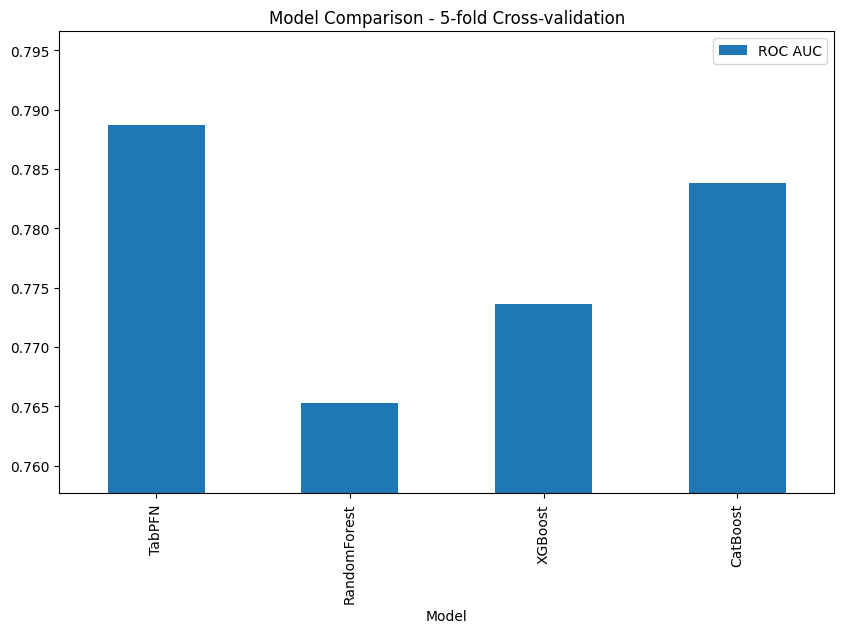

In [13]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.99, df['ROC AUC'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation')

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [14]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = AutoTabPFNClassifier(max_time=30) # runs for 30 seconds, longer ensembling time leads to better results
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Accuracy", accuracy_score(y_test, predictions))

2025-01-18 20:53:38 INFO     Using `default` preset for Post Hoc Ensemble.
2025-01-18 20:53:38 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-01-18 20:53:38 INFO     Using task type: TaskType.BINARY
2025-01-18 20:53:38 INFO     Obtaining TabPFN models from a random portfolio.
2025-01-18 20:53:39 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_tabpfn_model_13', 'random_rf_pfn_model_14', 'random_rf_pfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_rf_pfn_model_18', 'random_tabpfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_rf_pfn_m

ROC AUC: 0.9969162452201801
Accuracy 0.973404255319149


## Regression

We now compare the regression performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on the toy data from scikit-learn.

We measure regression performance using [Root Mean Squared Error](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_error.html).

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and


Loaded diabetes dataset
Dataset shape: (442, 10)

Feature names:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Data split complete:
Training set shape: (353, 10)
Test set shape: (89, 10)

Results:
Mean Squared Error: 0.4504
R² Score: 0.4960


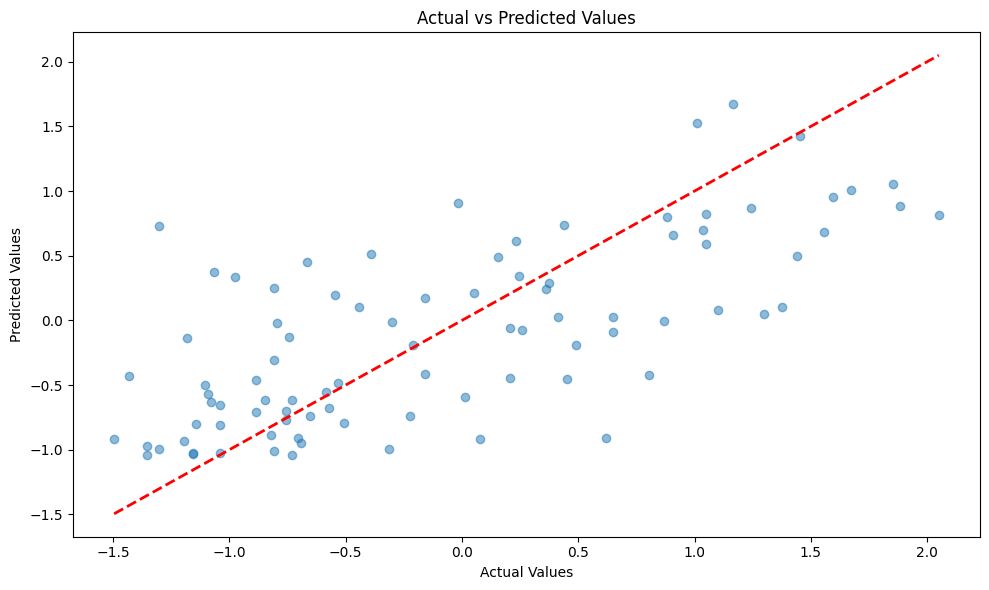

In [15]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tabpfn import TabPFNRegressor

def load_dataset(dataset_name='diabetes'):
    """
    Load the diabetes dataset for regression
    
    Returns:
    --------
    X : array-like
        Feature matrix
    y : array-like
        Target vector
    feature_names : list
        Names of features
    """
    try:
        data = load_diabetes()
        X = data.data
        y = data.target
        feature_names = data.feature_names
            
        print(f"\nLoaded {dataset_name} dataset")
        print(f"Dataset shape: {X.shape}")
        print("\nFeature names:")
        print(feature_names)
        
        return X, y, feature_names
        
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None, None, None

# Load data
X, y, feature_names = load_dataset('diabetes')

# Scale the target variable (important for regression)
y = (y - y.mean()) / y.std()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData split complete:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Train TabPFN
regressor = TabPFNRegressor(device='cuda')  # Removed N_ensemble_configurations
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResults:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

In [16]:
# Boston Housing dataset
# Regression task: Predict house prices
# Features: Neighborhood characteristics, housing attributes
# Samples: 506 neighborhoods
# Target: Median house value in $1000s

#Using scikit-learn's built-in diabetes dataset (since Boston Housing is deprecated)
#df = fetch_openml(data_id=531, as_frame=True)

# Alternative datasets (commented for reference):

# Liver Disorders dataset
# Classification task: Predict liver disorder presence
# Features: Blood test results, alcohol consumption
# Samples: 345 patients
# Target: Binary liver disorder diagnosis
# df = fetch_openml("liver-disorders", version=1)

# Grid Stability dataset
# Regression task: Predict electrical grid stability
# Features: Power system measurements, grid parameters
# Samples: 10,000 simulations
# Target: Grid stability score
#df = fetch_openml(data_id=44973, as_frame=True)

# Concrete Compressive Strength dataset
# Regression task: Predict concrete strength
# Features: Concrete components (cement, water, aggregates)
# Samples: 1,030 concrete samples
# Target: Compressive strength in MPa
#df = fetch_openml(data_id=44959, as_frame=True)

#X, y = df.data, df.target

# Convert all 'object' and 'category' columns to numeric
#for col in X.select_dtypes(['object', 'category']).columns:
#    X[col] = pd.factorize(X[col])[0]  # Factorize encodes as integers

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset description
#display(Markdown(df['DESCR']))

#display(X)

In [17]:
# Train and evaluate TabPFN
reg = TabPFNRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate Variance Explained (R2 Score)
score = root_mean_squared_error(y_test, y_pred)
print(f"TabPFN RMSE: {score:.4f}")

TabPFN RMSE: 0.6700


Compare different machine learning models by training each one multiple times
on different parts of the data and averaging their performance scores for a
 more reliable performance estimate

<timed exec>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


ValueError: x and y must be the same size

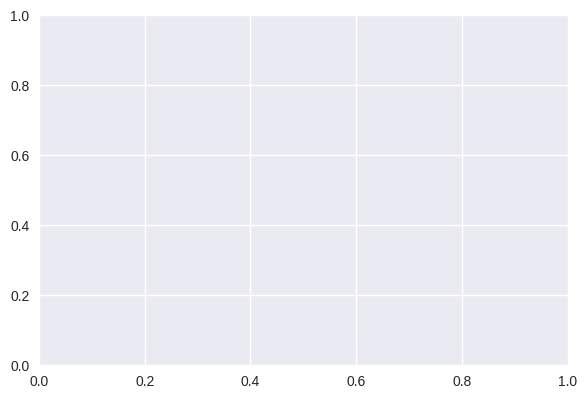

In [18]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  # Add this import
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd

# Set style for better visualizations
plt.style.use('seaborn')
fig = plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted Plot
ax1 = plt.subplot(2, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# 2. Residuals Plot
ax2 = plt.subplot(2, 2, 2)
residuals = y_test - predictions
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# 3. Model Comparison
ax3 = plt.subplot(2, 2, 3)
models = {
    'TabPFN': AutoTabPFNRegressor(max_time=45, device='cuda',random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    cv_scores[name] = -scores.mean()

plt.bar(cv_scores.keys(), cv_scores.values())
plt.title('Model Comparison - RMSE')
plt.xticks(rotation=45)
plt.ylabel('Root Mean Squared Error')

# 4. Feature Importance (using Random Forest as proxy)
ax4 = plt.subplot(2, 2, 4)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'feature': load_diabetes().feature_names,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nDetailed Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.show()

# Print additional statistics
print("\nResiduals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.2f}")
print(f"Skewness of Residuals: {stats.skew(residuals):.2f}")

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [19]:
%%time
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import warnings

# Temporarily suppress the FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Load and split data
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)

# Train model
reg = AutoTabPFNRegressor(max_time=45, device='cuda', random_state=42)  # runs for 30 seconds
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

# Calculate metrics using new API
rmse = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print results with nice formatting
print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

2025-01-18 20:55:50 INFO     Using `default` preset for Post Hoc Ensemble.
2025-01-18 20:55:50 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-01-18 20:55:50 INFO     Using task type: TaskType.REGRESSION
2025-01-18 20:55:50 INFO     Obtaining TabPFN models from a random portfolio.
2025-01-18 20:55:51 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_tabpfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_rf_pfn_model_6', 'random_rf_pfn_model_7', 'random_tabpfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_rf_pfn_model_13', 'random_tabpfn_model_14', 'random_tabpfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_tabpfn_model_18', 'random_rf_pfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_tabp


Model Performance Metrics:
Root Mean Squared Error (RMSE): 51.80
Mean Absolute Error (MAE): 40.95
R-squared (R²): 0.5338
CPU times: user 4min 25s, sys: 2min 8s, total: 6min 33s
Wall time: 1min 2s


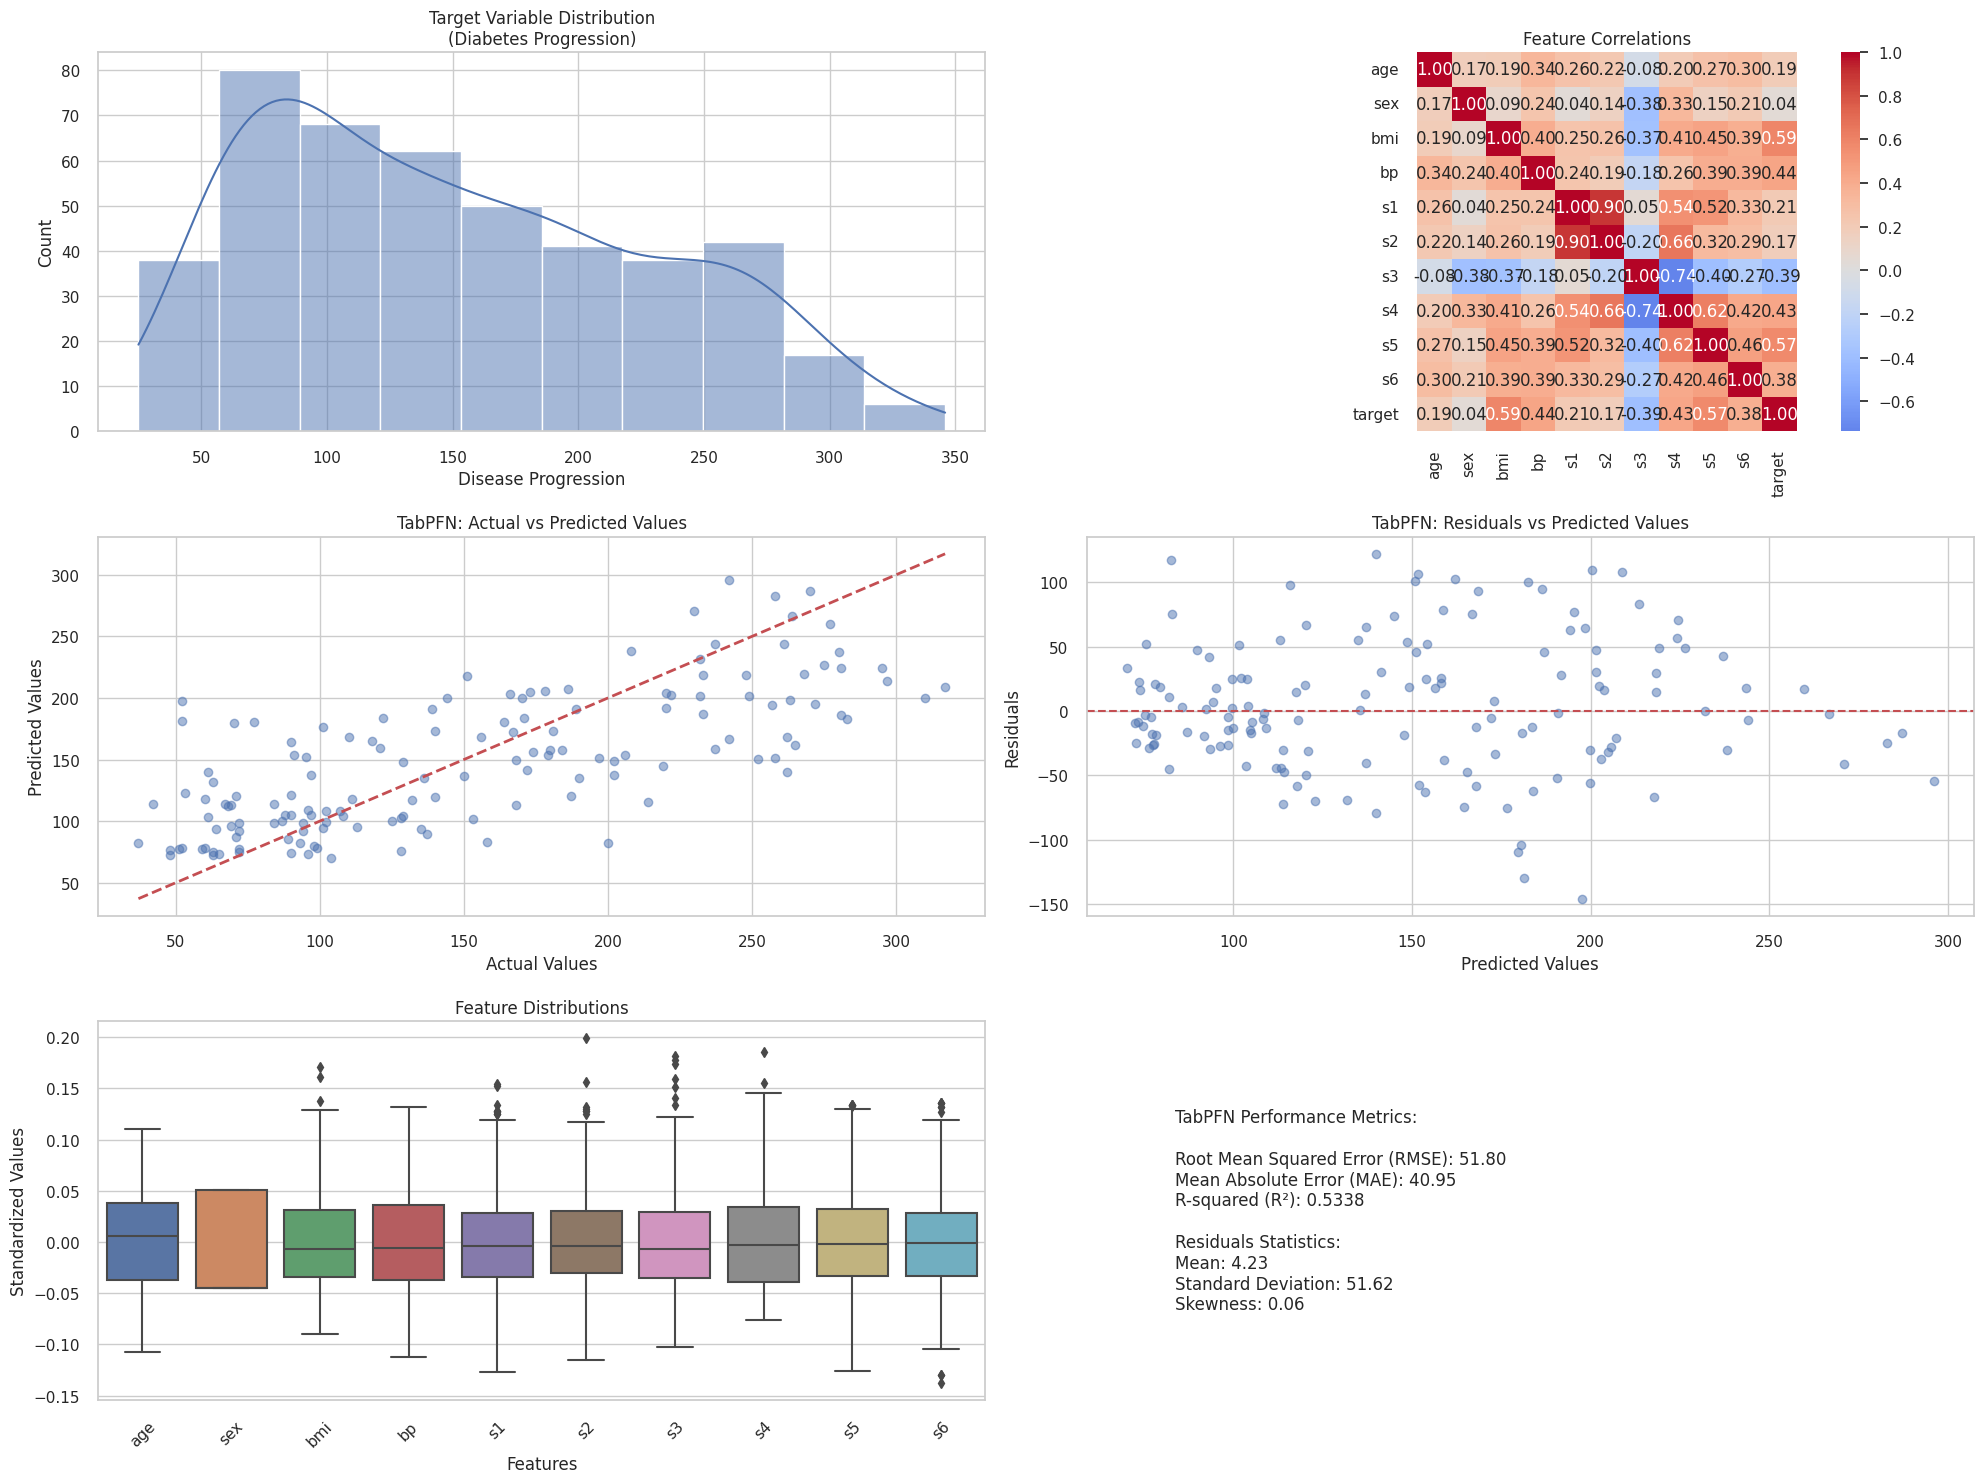


Diabetes Dataset Description:
This dataset predicts disease progression one year after baseline for diabetes patients.

Feature Descriptions:
--------------------------------------------------------------------------------
age................. Age of the patient
sex................. Gender of the patient
bmi................. Body Mass Index
bp.................. Average blood pressure
s1.................. Total serum cholesterol
s2.................. Low-density lipoproteins
s3.................. High-density lipoproteins
s4.................. Total cholesterol / HDL
s5.................. Log of serum triglycerides level
s6.................. Blood sugar level

Target Variable:
--------------------------------------------------------------------------------
Disease Progression: Quantitative measure of disease progression one year after baseline

Dataset Statistics:
--------------------------------------------------------------------------------
Number of Instances: 442
Number of Features: 1

In [20]:
# Illustrate the data and the results

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Get the full dataset description
diabetes = load_diabetes()
dataset_description = diabetes.DESCR

# Create a figure with multiple subplots
# Set seaborn style directly instead of using matplotlib's seaborn style
sns.set_theme(style="whitegrid")  # Modern seaborn styling
fig = plt.figure(figsize=(20, 15))

# 1. Data Distribution Plot
ax1 = plt.subplot(3, 2, 1)
sns.histplot(y, kde=True)
plt.title('Target Variable Distribution\n(Diabetes Progression)')
plt.xlabel('Disease Progression')
plt.ylabel('Count')

# 2. Feature Correlations
ax2 = plt.subplot(3, 2, 2)
data = pd.DataFrame(X, columns=diabetes.feature_names)
data['target'] = y
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', square=True)
plt.title('Feature Correlations')

# 3. Actual vs Predicted
ax3 = plt.subplot(3, 2, 3)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('TabPFN: Actual vs Predicted Values')

# 4. Residuals Plot
ax4 = plt.subplot(3, 2, 4)
residuals = y_test - predictions
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('TabPFN: Residuals vs Predicted Values')

# 5. Feature Distributions
ax5 = plt.subplot(3, 2, 5)
data_melted = data.melt(id_vars=['target'])
sns.boxplot(x='variable', y='value', data=data_melted)
plt.xticks(rotation=45)
plt.title('Feature Distributions')
plt.xlabel('Features')
plt.ylabel('Standardized Values')

# 6. Performance Metrics Text
ax6 = plt.subplot(3, 2, 6)
plt.axis('off')
metrics_text = (
    f"TabPFN Performance Metrics:\n\n"
    f"Root Mean Squared Error (RMSE): {rmse:.2f}\n"
    f"Mean Absolute Error (MAE): {mae:.2f}\n"
    f"R-squared (R²): {r2:.4f}\n\n"
    f"Residuals Statistics:\n"
    f"Mean: {np.mean(residuals):.2f}\n"
    f"Standard Deviation: {np.std(residuals):.2f}\n"
    f"Skewness: {stats.skew(residuals):.2f}"
)
plt.text(0.1, 0.5, metrics_text, fontsize=12, va='center')

plt.tight_layout()
plt.show()

# Print detailed dataset information
print("\nDiabetes Dataset Description:")
print("=" * 80)
print("This dataset predicts disease progression one year after baseline for diabetes patients.")
print("\nFeature Descriptions:")
print("-" * 80)
feature_descriptions = {
    'age': "Age of the patient",
    'sex': "Gender of the patient",
    'bmi': "Body Mass Index",
    'bp': "Average blood pressure",
    's1': "Total serum cholesterol",
    's2': "Low-density lipoproteins",
    's3': "High-density lipoproteins",
    's4': "Total cholesterol / HDL",
    's5': "Log of serum triglycerides level",
    's6': "Blood sugar level"
}

for name, description in feature_descriptions.items():
    print(f"{name:.<20} {description}")

print("\nTarget Variable:")
print("-" * 80)
print("Disease Progression: Quantitative measure of disease progression one year after baseline")

print("\nDataset Statistics:")
print("-" * 80)
print(f"Number of Instances: {X.shape[0]}")
print(f"Number of Features: {X.shape[1]}")
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")

print("\nFeature Statistics:")
print("-" * 80)
stats_df = pd.DataFrame({
    'Mean': data.mean(),
    'Std': data.std(),
    'Min': data.min(),
    'Max': data.max()
})
print(stats_df)

print("\nModel Configuration:")
print("-" * 80)
print(f"Model: TabPFN Regressor")
print(f"Maximum Training Time: 45 seconds")
print(f"Device: CUDA")
print(f"Random State: 42")

print("\nModel Performance:")
print("-" * 80)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")



# Predictive Behavior of TabPFN

In this section, we explore the behavior of predictions from TabPFN on various toy functions.

## Decision Boundary during Classification

First, let us inspect the decision boundary for different classifiers.
The decision bounds show how smoothly a model learns to transition between classes and how well it fits the data.

In the first cell, we create the data and code to plot the decision boundary. The second cell then generates the plot.

In [21]:
# Toy functions that generate the data
def generate_circle(n_datapoints, radius, noise_factor):
    angles = np.linspace(0, 2*np.pi, n_datapoints).T
    x = radius * np.cos(angles) + np.random.randn(n_datapoints) * noise_factor
    y = radius * np.sin(angles) + np.random.randn(n_datapoints) * noise_factor

    return np.stack([x, y]).T

def generate_concentric_cirlces(radii, num_points_per_circle, noise_factor=1/15):
    circles = []
    for r, num_points in zip(radii, num_points_per_circle):
        circles.append(generate_circle(num_points, r, noise_factor))

    circle = np.vstack(circles)
    return circle

def generate_circle_data(num_points_per_circle, radii, noise_factor):
    radii = np.array(radii)
    circles_1 = generate_concentric_cirlces(radii, num_points_per_circle, noise_factor)
    circles_1 = np.hstack([circles_1, np.zeros((sum(num_points_per_circle) , 1))])

    circles_2 = generate_concentric_cirlces(radii + 0.3, num_points_per_circle, noise_factor)
    circles_2 = np.hstack([circles_2, np.ones((sum(num_points_per_circle), 1))])

    circles = np.vstack([circles_1, circles_2])
    X, y = circles[:, :2], circles[:, 2]
    return X, y

# Generate the data
X_train, y_train = generate_circle_data(
  num_points_per_circle=[50, 100, 200],
  radii=[1,2,4],
  noise_factor=0.1
)

# Function for plotting
def plot_decision_boundary(ax, model, model_name):
    cmap = ListedColormap(["#FF0000", "#0000FF"])
    ax.set_title(model_name)
    DecisionBoundaryDisplay.from_estimator(
        model, X_train[:, :2], alpha=0.6, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=plt.cm.RdBu,
    )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

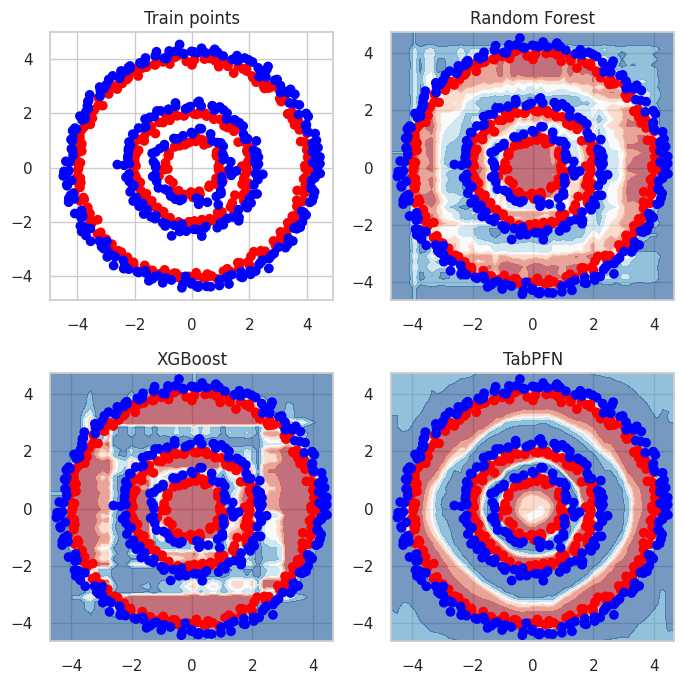

In [22]:
rf = RandomForestClassifier().fit(X_train[:, :2], y_train)
xgb = XGBClassifier().fit(X_train[:, :2], y_train)
tabpfn = TabPFNClassifier().fit(X_train[:, :2], y_train)

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(7,7))

# Plot Train Points
ax_points = axes[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(["#FF0000", "#0000FF"]))

# Plot Random Forest
ax_rf = axes[0, 1]
plot_decision_boundary(ax_rf, rf, "Random Forest")

# Plot XGBoost
ax_xgb = axes[1, 0]
plot_decision_boundary(ax_xgb, xgb, "XGBoost")

# Plot TabPFN
ax_tabpfn = axes[1, 1]
plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Sin Curve Fitting with Regression

Next, we investigate the curve-fitting behavior of the different models on a sin curve.

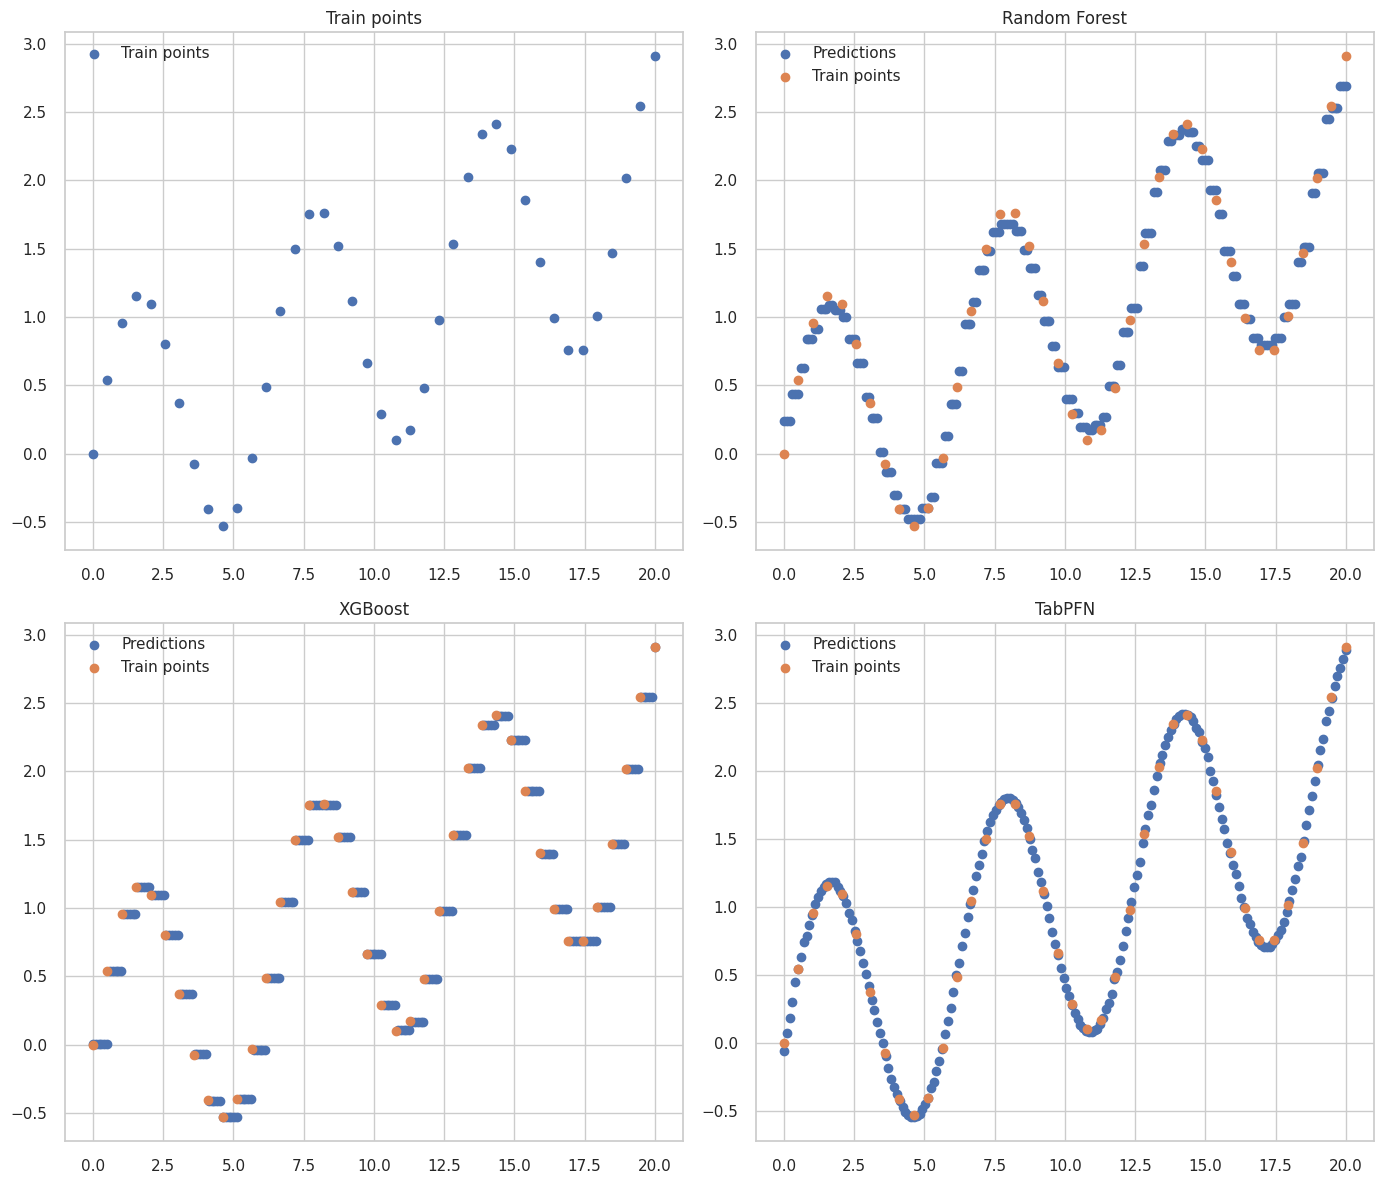

In [23]:
# Toy function to generate data
def generate_sinx_plus_x(N):
    x = np.linspace(0, 20, N)
    y = np.sin(x) + x/10

    return x.reshape(-1, 1), y

# Utility function for plotting
def plot_predictions(ax, model, model_name):
    X_test = np.linspace(0, 20, 200).reshape(-1, 1) # Predict for 200 points  between 0 and 20
    y_preds = model.predict(X_test)
    ax.set_title(model_name)
    ax.scatter(X_test, y_preds, label="Predictions")
    ax.scatter(X_train, y_train, label="Train points")
    ax.legend()

# Generate data
X_train, y_train = generate_sinx_plus_x(N=40)

# Fit Models
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42).fit(X_train, y_train)
tabpfn = TabPFNRegressor()
tabpfn.fit(X_train, y_train)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot train points
ax_points = axs[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train, y_train, label="Train points")
ax_points.legend()

# Plot predictions for Random Forest
ax_rf = axs[0, 1]
plot_predictions(ax_rf, rf, "Random Forest")

# Plot predictions for XGBoost
ax_xgb = axs[1, 0]
plot_predictions(ax_xgb, xgb, "XGBoost")

# Plot predictions for TabPFN
ax_tabpfn = axs[1, 1]
plot_predictions(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Uncertainty of TabPFN / Quantile Regresison

---



TabPFN is trained to predict the distribution of the target variable and not just a single point. This is also the case for regression.

As a result, we natively obtain uncertainty for the predictions of TabPFN (without the need for a new model or repeating models for different quantiles).

In the following, we plot the uncertainty of TabPFN for a toy function with noise.

In [24]:
### Code to generate the plot (feel free to ignore)
def plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, full_preds, color_multiplier=5):
  all_quantiles = preds[f"quantiles"]
  y = np.array(all_quantiles) # shape of y: (9, number of samples)

  # Calculate the maximum and minimum values in y
  y_max = np.max(y, axis=0)
  y_min = np.min(y, axis=0)

  # Calculate the widths of each quantile bin
  quantile_bin_widths = np.diff(y, axis=0) # shape of quantile_bin_widths: (8, number of samples)

  # Normalize the bin widths for a given x
  per_x_normalized_bin_widths = (quantile_bin_widths) / (y_max - y_min)

  # Plotting
  num_bins, num_data_points = per_x_normalized_bin_widths.shape[0], per_x_normalized_bin_widths.shape[1]
  rect_width = (x_test[1] - x_test[0]).squeeze() # assuming the x query points are equally spaced out

  for i in range(num_data_points):
      for j in range(num_bins):
          rect_height = quantile_bin_widths[j, i]
          rect = plt.Rectangle(
                    xy=(x_test[i][0] - rect_width / 2, y[j, i]),
                    width=rect_width,
                    height=quantile_bin_widths[j, i],
                    facecolor=plt.cm.viridis(per_x_normalized_bin_widths[j, i] * color_multiplier),
                    edgecolor='none'
                )
          ax.add_patch(rect)

  # Set limits and labels
  ax.plot(x, y_line, label='True line', color='blue')
  ax.set_xlim(min(x_test) - 1, max(x_test) + 1)
  ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')

  # ax.plot(x, y, label='True line', color='blue')
  ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)

  plt.title('TabPFN Regression Uncertainty')
  plt.show()

# Generate Data
def generate_line_with_heteroscedastic_noise(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    x = np.linspace(x_start, x_end, num_points)
    noise = np.random.randn(num_points)
    y = m * x
    y_noisy = y + (noise * noise_factor * x)

    return x.reshape(-1, 1), y, y_noisy

def generate_line_with_heteroscedastic_noise_with_gap(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    extra_points = num_points // 3
    x, y, y_noisy = generate_line_with_heteroscedastic_noise(m, num_points+extra_points, x_start, x_end, noise_factor)
    a = np.arange(num_points + extra_points)
    idx = np.where((a < num_points/3) | (a > num_points/3 + extra_points))
    return x[idx], y[idx], y_noisy[idx]

x, y_line, y_noisy = generate_line_with_heteroscedastic_noise_with_gap(0.8)
x_test = np.linspace(0, 100, 200).reshape(-1, 1)

In [25]:
reg = TabPFNRegressor()
reg.fit(x, y_noisy)
preds = reg.predict(x_test, output_type="full")

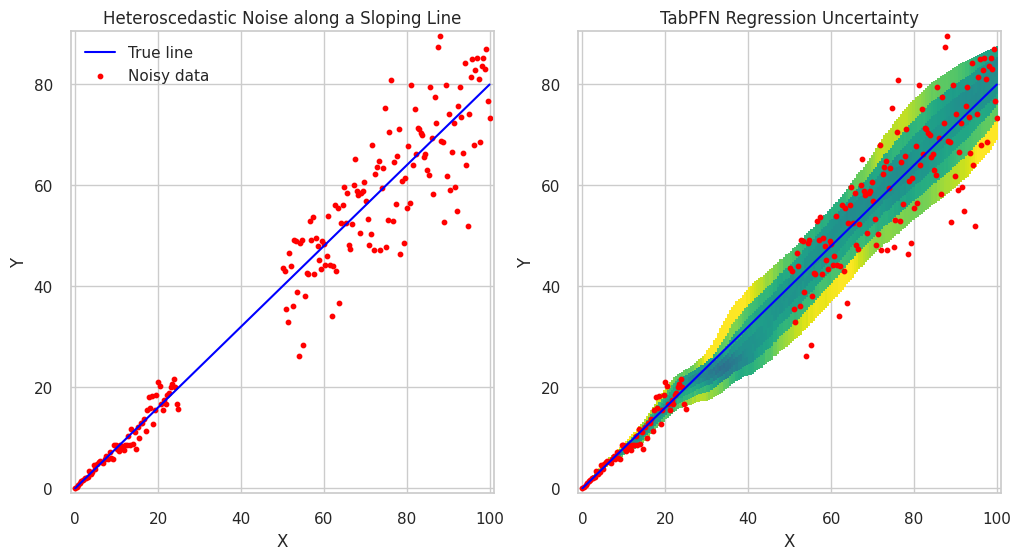

In [26]:
fig = plt.figure(figsize=(12,6))

# Plot the original data
ax = fig.add_subplot(121)
ax.plot(x, y_line, label='True line', color='blue')
ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
ax.set_title('Heteroscedastic Noise along a Sloping Line')
ax.legend()

# plot the uncertainty estimates obtained from TabPFN
ax = fig.add_subplot(122)
plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, preds, color_multiplier=5)

## BATMAN

Na na na na

na na na na

na na na na na

Batman

File ‘thebat.npy’ already there; not retrieving.



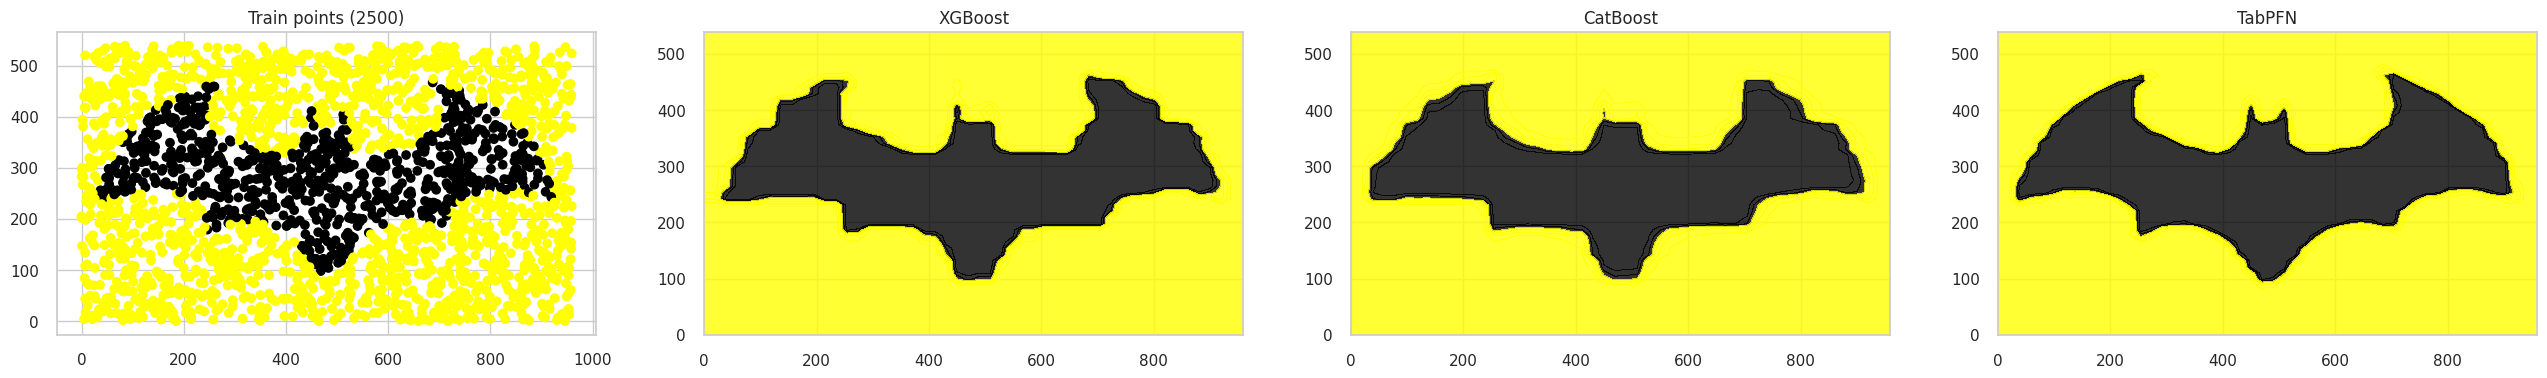

In [27]:
# "Just run this, no questions" - Batman
!wget -nc https://github.com/PriorLabs/TabPFNDemoFiles/raw/main/thebat.npy # download a file we need

def sample_random_points(n, array, seed):
    np.random.seed(seed)
    x, y = np.random.randint(0, array.shape[1], (n,)), np.random.randint(0, array.shape[0], (n,))
    return np.vstack((x, y)).T, array[y, x].reshape(-1, 1).flatten()

def plot_for_all_models(n_train_points, data_source="thebat.npy", random_state=9001):
    # Load the data
    data_array = np.load(data_source)
    X_train, y_train = sample_random_points(n_train_points, data_array, random_state)

    # Fit models
    xgb = XGBClassifier(random_state=42).fit(X_train, y_train)
    catboost = CatBoostClassifier(random_state=42, verbose=0).fit(X_train, y_train)
    tabpfn = TabPFNClassifier()
    tabpfn.fit(X_train, y_train)

    ####### PLOTTING  #######
    cmap = ListedColormap(["black", "yellow"])
    def plot_decision_boundary(ax, model, model_name):
        ax.set_title(model_name)
        ax.set_aspect("equal")
        DecisionBoundaryDisplay.from_estimator(
            model, X_train, alpha=0.8, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=cmap
        )
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

    fig = plt.figure(figsize=(32,8))

    ### Plot Train Points ###
    ax_points = fig.add_subplot(141)
    ax_points.set_title(f"Train points ({n_train_points})")
    ax_points.set_aspect("equal")
    ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)

    ### Plot XGBoost ###
    ax_xgb = fig.add_subplot(142)
    plot_decision_boundary(ax_xgb, xgb, "XGBoost")

    ### Plot Random Forest ###
    ax_catboost = fig.add_subplot(143)
    plot_decision_boundary(ax_catboost, catboost, "CatBoost")

    ### Plot TabPFN ###
    ax_tabpfn = fig.add_subplot(144)
    plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

plot_for_all_models(n_train_points=2500, data_source="thebat.npy", random_state=9001)

## Random Search

Binary (breast_cancer), Multiclass (iris), Regression (diabetes)

In [28]:
%%time

from tabpfn_extensions.hpo import (
    TunedTabPFNRegressor,
    TunedTabPFNClassifier,
)

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = TunedTabPFNClassifier(device='cuda', random_state=42)
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("Binary (breast_cancer) ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Binary (breast_cancer) Accuracy ", accuracy_score(y_test, predictions))

# Multiclass
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
clf = TunedTabPFNClassifier(device='cuda', random_state=42)
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("\nMulticlass (iris) ROC AUC:", roc_auc_score(y_test, prediction_probabilities, multi_class="ovr"))
print("Multiclass (iris) Accuracy ", accuracy_score(y_test, predictions))

# Regression
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
reg = TunedTabPFNRegressor(device='cuda', random_state=42)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("\nRegression (diabetes) Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Regression (diabetes) Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("Regression (diabetes) R-squared (R^2):", r2_score(y_test, predictions))

2025-01-18 20:57:03 INFO     No categorical features specified. Using all features as numeric.


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-18 20:57:03 INFO     build_posterior_wrapper took 0.019125 seconds
2025-01-18 20:57:03 INFO     TPE using 0 trials


  2%|▏         | 1/50 [00:01<00:53,  1.09s/trial, best loss: -0.974025974025974]

2025-01-18 20:57:04 INFO     build_posterior_wrapper took 0.040281 seconds
2025-01-18 20:57:04 INFO     TPE using 1/1 trials with best loss -0.974026


  4%|▍         | 2/50 [00:01<00:29,  1.60trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:04 INFO     build_posterior_wrapper took 0.037678 seconds
2025-01-18 20:57:04 INFO     TPE using 2/2 trials with best loss -0.974026
2025-01-18 20:57:04 INFO     build_posterior_wrapper took 0.019199 seconds
2025-01-18 20:57:04 INFO     TPE using 3/3 trials with best loss -0.974026
2025-01-18 20:57:04 INFO     build_posterior_wrapper took 0.019224 seconds
2025-01-18 20:57:04 INFO     TPE using 4/4 trials with best loss -0.974026
2025-01-18 20:57:04 INFO     build_posterior_wrapper took 0.018595 seconds
2025-01-18 20:57:04 INFO     TPE using 5/5 trials with best loss -0.974026


 12%|█▏        | 6/50 [00:01<00:09,  4.79trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:05 INFO     build_posterior_wrapper took 0.311018 seconds
2025-01-18 20:57:05 INFO     TPE using 6/6 trials with best loss -0.974026


 14%|█▍        | 7/50 [00:02<00:10,  4.28trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:05 INFO     build_posterior_wrapper took 0.036810 seconds
2025-01-18 20:57:05 INFO     TPE using 7/7 trials with best loss -0.974026
2025-01-18 20:57:05 INFO     build_posterior_wrapper took 0.019481 seconds
2025-01-18 20:57:05 INFO     TPE using 8/8 trials with best loss -0.974026


 18%|█▊        | 9/50 [00:02<00:08,  4.89trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:05 INFO     build_posterior_wrapper took 0.020254 seconds
2025-01-18 20:57:05 INFO     TPE using 9/9 trials with best loss -0.974026


 20%|██        | 10/50 [00:03<00:12,  3.16trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:06 INFO     build_posterior_wrapper took 0.021216 seconds
2025-01-18 20:57:06 INFO     TPE using 10/10 trials with best loss -0.974026


 22%|██▏       | 11/50 [00:03<00:12,  3.16trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:06 INFO     build_posterior_wrapper took 0.020522 seconds
2025-01-18 20:57:06 INFO     TPE using 11/11 trials with best loss -0.974026
2025-01-18 20:57:06 INFO     build_posterior_wrapper took 0.019922 seconds
2025-01-18 20:57:06 INFO     TPE using 12/12 trials with best loss -0.974026


 26%|██▌       | 13/50 [00:03<00:09,  3.99trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:07 INFO     build_posterior_wrapper took 0.020506 seconds
2025-01-18 20:57:07 INFO     TPE using 13/13 trials with best loss -0.974026
2025-01-18 20:57:07 INFO     build_posterior_wrapper took 0.019256 seconds
2025-01-18 20:57:07 INFO     TPE using 14/14 trials with best loss -0.974026


 30%|███       | 15/50 [00:04<00:07,  4.40trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:07 INFO     build_posterior_wrapper took 0.020210 seconds
2025-01-18 20:57:07 INFO     TPE using 15/15 trials with best loss -0.974026
2025-01-18 20:57:07 INFO     build_posterior_wrapper took 0.020740 seconds
2025-01-18 20:57:07 INFO     TPE using 16/16 trials with best loss -0.974026


 34%|███▍      | 17/50 [00:04<00:08,  3.72trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:08 INFO     build_posterior_wrapper took 0.278683 seconds
2025-01-18 20:57:08 INFO     TPE using 17/17 trials with best loss -0.974026


 36%|███▌      | 18/50 [00:05<00:08,  3.67trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:08 INFO     build_posterior_wrapper took 0.020483 seconds
2025-01-18 20:57:08 INFO     TPE using 18/18 trials with best loss -0.974026
2025-01-18 20:57:08 INFO     build_posterior_wrapper took 0.020416 seconds
2025-01-18 20:57:08 INFO     TPE using 19/19 trials with best loss -0.974026


 40%|████      | 20/50 [00:05<00:07,  3.83trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:08 INFO     build_posterior_wrapper took 0.020571 seconds
2025-01-18 20:57:08 INFO     TPE using 20/20 trials with best loss -0.974026


 42%|████▏     | 21/50 [00:06<00:10,  2.71trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:09 INFO     build_posterior_wrapper took 0.021635 seconds
2025-01-18 20:57:09 INFO     TPE using 21/21 trials with best loss -0.974026


 44%|████▍     | 22/50 [00:07<00:14,  1.95trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:10 INFO     build_posterior_wrapper took 0.022197 seconds
2025-01-18 20:57:10 INFO     TPE using 22/22 trials with best loss -0.974026


 46%|████▌     | 23/50 [00:08<00:18,  1.50trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:11 INFO     build_posterior_wrapper took 0.027681 seconds
2025-01-18 20:57:11 INFO     TPE using 23/23 trials with best loss -0.974026


 48%|████▊     | 24/50 [00:09<00:16,  1.58trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:12 INFO     build_posterior_wrapper took 0.061959 seconds
2025-01-18 20:57:12 INFO     TPE using 24/24 trials with best loss -0.974026


 50%|█████     | 25/50 [00:09<00:15,  1.64trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:12 INFO     build_posterior_wrapper took 0.022516 seconds
2025-01-18 20:57:12 INFO     TPE using 25/25 trials with best loss -0.974026


 52%|█████▏    | 26/50 [00:10<00:16,  1.48trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:13 INFO     build_posterior_wrapper took 0.021792 seconds
2025-01-18 20:57:13 INFO     TPE using 26/26 trials with best loss -0.974026


 54%|█████▍    | 27/50 [00:10<00:14,  1.57trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:14 INFO     build_posterior_wrapper took 0.020097 seconds
2025-01-18 20:57:14 INFO     TPE using 27/27 trials with best loss -0.974026


 56%|█████▌    | 28/50 [00:11<00:12,  1.74trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:14 INFO     build_posterior_wrapper took 0.283748 seconds
2025-01-18 20:57:14 INFO     TPE using 28/28 trials with best loss -0.974026


 58%|█████▊    | 29/50 [00:12<00:13,  1.58trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:15 INFO     build_posterior_wrapper took 0.021574 seconds
2025-01-18 20:57:15 INFO     TPE using 29/29 trials with best loss -0.974026


 60%|██████    | 30/50 [00:12<00:10,  1.87trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:15 INFO     build_posterior_wrapper took 0.021322 seconds
2025-01-18 20:57:15 INFO     TPE using 30/30 trials with best loss -0.974026


 62%|██████▏   | 31/50 [00:13<00:11,  1.73trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:16 INFO     build_posterior_wrapper took 0.020913 seconds
2025-01-18 20:57:16 INFO     TPE using 31/31 trials with best loss -0.974026


 64%|██████▍   | 32/50 [00:13<00:09,  1.88trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:16 INFO     build_posterior_wrapper took 0.020290 seconds
2025-01-18 20:57:16 INFO     TPE using 32/32 trials with best loss -0.974026


 66%|██████▌   | 33/50 [00:13<00:08,  2.12trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:17 INFO     build_posterior_wrapper took 0.019842 seconds
2025-01-18 20:57:17 INFO     TPE using 33/33 trials with best loss -0.974026


 68%|██████▊   | 34/50 [00:14<00:06,  2.31trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:17 INFO     build_posterior_wrapper took 0.020025 seconds
2025-01-18 20:57:17 INFO     TPE using 34/34 trials with best loss -0.974026


 70%|███████   | 35/50 [00:14<00:05,  2.51trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:17 INFO     build_posterior_wrapper took 0.020289 seconds
2025-01-18 20:57:17 INFO     TPE using 35/35 trials with best loss -0.974026


 72%|███████▏  | 36/50 [00:15<00:06,  2.13trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:18 INFO     build_posterior_wrapper took 0.020249 seconds
2025-01-18 20:57:18 INFO     TPE using 36/36 trials with best loss -0.974026
2025-01-18 20:57:18 INFO     build_posterior_wrapper took 0.019422 seconds
2025-01-18 20:57:18 INFO     TPE using 37/37 trials with best loss -0.974026


 76%|███████▌  | 38/50 [00:15<00:03,  3.01trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:19 INFO     build_posterior_wrapper took 0.288474 seconds
2025-01-18 20:57:19 INFO     TPE using 38/38 trials with best loss -0.974026


 78%|███████▊  | 39/50 [00:16<00:04,  2.38trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:19 INFO     build_posterior_wrapper took 0.020597 seconds
2025-01-18 20:57:19 INFO     TPE using 39/39 trials with best loss -0.974026
2025-01-18 20:57:19 INFO     build_posterior_wrapper took 0.019501 seconds
2025-01-18 20:57:19 INFO     TPE using 40/40 trials with best loss -0.974026


 82%|████████▏ | 41/50 [00:16<00:03,  2.98trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:19 INFO     build_posterior_wrapper took 0.021025 seconds
2025-01-18 20:57:19 INFO     TPE using 41/41 trials with best loss -0.974026


 84%|████████▍ | 42/50 [00:16<00:02,  3.01trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:20 INFO     build_posterior_wrapper took 0.020486 seconds
2025-01-18 20:57:20 INFO     TPE using 42/42 trials with best loss -0.974026
2025-01-18 20:57:20 INFO     build_posterior_wrapper took 0.019339 seconds
2025-01-18 20:57:20 INFO     TPE using 43/43 trials with best loss -0.974026


 88%|████████▊ | 44/50 [00:17<00:01,  3.76trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:20 INFO     build_posterior_wrapper took 0.020302 seconds
2025-01-18 20:57:20 INFO     TPE using 44/44 trials with best loss -0.974026
2025-01-18 20:57:20 INFO     build_posterior_wrapper took 0.019303 seconds
2025-01-18 20:57:20 INFO     TPE using 45/45 trials with best loss -0.974026


 92%|█████████▏| 46/50 [00:17<00:00,  4.31trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:20 INFO     build_posterior_wrapper took 0.020111 seconds
2025-01-18 20:57:20 INFO     TPE using 46/46 trials with best loss -0.974026


 94%|█████████▍| 47/50 [00:18<00:00,  3.77trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:21 INFO     build_posterior_wrapper took 0.020655 seconds
2025-01-18 20:57:21 INFO     TPE using 47/47 trials with best loss -0.974026
2025-01-18 20:57:21 INFO     build_posterior_wrapper took 0.019033 seconds
2025-01-18 20:57:21 INFO     TPE using 48/48 trials with best loss -0.974026


 98%|█████████▊| 49/50 [00:18<00:00,  3.94trial/s, best loss: -0.974025974025974]

2025-01-18 20:57:21 INFO     build_posterior_wrapper took 0.020250 seconds
2025-01-18 20:57:21 INFO     TPE using 49/49 trials with best loss -0.974026


100%|██████████| 50/50 [00:19<00:00,  2.61trial/s, best loss: -0.974025974025974]


2025-01-18 20:57:22 INFO     No categorical features specified. Using all features as numeric.


Binary (breast_cancer) ROC AUC: 0.9971629456025657
Binary (breast_cancer) Accuracy  0.9840425531914894
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-18 20:57:22 INFO     build_posterior_wrapper took 0.018706 seconds
2025-01-18 20:57:22 INFO     TPE using 0 trials


  2%|▏         | 1/50 [00:00<00:10,  4.48trial/s, best loss: -0.95]

2025-01-18 20:57:23 INFO     build_posterior_wrapper took 0.021547 seconds
2025-01-18 20:57:23 INFO     TPE using 1/1 trials with best loss -0.950000


  4%|▍         | 2/50 [00:00<00:11,  4.27trial/s, best loss: -0.95]

2025-01-18 20:57:23 INFO     build_posterior_wrapper took 0.020827 seconds
2025-01-18 20:57:23 INFO     TPE using 2/2 trials with best loss -0.950000
2025-01-18 20:57:23 INFO     build_posterior_wrapper took 0.020751 seconds
2025-01-18 20:57:23 INFO     TPE using 3/3 trials with best loss -0.950000


  8%|▊         | 4/50 [00:00<00:07,  6.18trial/s, best loss: -0.95]

2025-01-18 20:57:23 INFO     build_posterior_wrapper took 0.020870 seconds
2025-01-18 20:57:23 INFO     TPE using 4/4 trials with best loss -0.950000


 10%|█         | 5/50 [00:00<00:07,  5.83trial/s, best loss: -0.95]

2025-01-18 20:57:23 INFO     build_posterior_wrapper took 0.041068 seconds
2025-01-18 20:57:23 INFO     TPE using 5/5 trials with best loss -0.950000
2025-01-18 20:57:23 INFO     build_posterior_wrapper took 0.040883 seconds
2025-01-18 20:57:23 INFO     TPE using 6/6 trials with best loss -0.950000
2025-01-18 20:57:23 INFO     build_posterior_wrapper took 0.023339 seconds
2025-01-18 20:57:23 INFO     TPE using 7/7 trials with best loss -0.950000


 16%|█▌        | 8/50 [00:01<00:05,  7.37trial/s, best loss: -0.95]

2025-01-18 20:57:24 INFO     build_posterior_wrapper took 0.050794 seconds
2025-01-18 20:57:24 INFO     TPE using 8/8 trials with best loss -0.950000
2025-01-18 20:57:24 INFO     build_posterior_wrapper took 0.319440 seconds
2025-01-18 20:57:24 INFO     TPE using 9/9 trials with best loss -0.950000


 20%|██        | 10/50 [00:01<00:08,  4.90trial/s, best loss: -0.95]

2025-01-18 20:57:24 INFO     build_posterior_wrapper took 0.020435 seconds
2025-01-18 20:57:24 INFO     TPE using 10/10 trials with best loss -0.950000


 22%|██▏       | 11/50 [00:02<00:08,  4.71trial/s, best loss: -0.95]

2025-01-18 20:57:25 INFO     build_posterior_wrapper took 0.021243 seconds
2025-01-18 20:57:25 INFO     TPE using 11/11 trials with best loss -0.950000


 24%|██▍       | 12/50 [00:02<00:08,  4.57trial/s, best loss: -0.95]

2025-01-18 20:57:25 INFO     build_posterior_wrapper took 0.023426 seconds
2025-01-18 20:57:25 INFO     TPE using 12/12 trials with best loss -0.950000


 26%|██▌       | 13/50 [00:02<00:08,  4.27trial/s, best loss: -0.95]

2025-01-18 20:57:25 INFO     build_posterior_wrapper took 0.021295 seconds
2025-01-18 20:57:25 INFO     TPE using 13/13 trials with best loss -0.950000
2025-01-18 20:57:25 INFO     build_posterior_wrapper took 0.021134 seconds
2025-01-18 20:57:25 INFO     TPE using 14/14 trials with best loss -0.950000
2025-01-18 20:57:25 INFO     build_posterior_wrapper took 0.019239 seconds
2025-01-18 20:57:25 INFO     TPE using 15/15 trials with best loss -0.950000
2025-01-18 20:57:25 INFO     build_posterior_wrapper took 0.020259 seconds
2025-01-18 20:57:25 INFO     TPE using 16/16 trials with best loss -0.950000


 34%|███▍      | 17/50 [00:02<00:03,  8.86trial/s, best loss: -0.95]

2025-01-18 20:57:25 INFO     build_posterior_wrapper took 0.019341 seconds
2025-01-18 20:57:25 INFO     TPE using 17/17 trials with best loss -0.950000
2025-01-18 20:57:25 INFO     build_posterior_wrapper took 0.021197 seconds
2025-01-18 20:57:25 INFO     TPE using 18/18 trials with best loss -0.950000


 38%|███▊      | 19/50 [00:03<00:04,  7.07trial/s, best loss: -0.95]

2025-01-18 20:57:26 INFO     build_posterior_wrapper took 0.022331 seconds
2025-01-18 20:57:26 INFO     TPE using 19/19 trials with best loss -0.950000
2025-01-18 20:57:26 INFO     build_posterior_wrapper took 0.283254 seconds
2025-01-18 20:57:26 INFO     TPE using 20/20 trials with best loss -0.950000


 42%|████▏     | 21/50 [00:03<00:05,  5.63trial/s, best loss: -0.95]

2025-01-18 20:57:26 INFO     build_posterior_wrapper took 0.021318 seconds
2025-01-18 20:57:26 INFO     TPE using 21/21 trials with best loss -0.950000


 44%|████▍     | 22/50 [00:03<00:05,  5.36trial/s, best loss: -0.95]

2025-01-18 20:57:26 INFO     build_posterior_wrapper took 0.021742 seconds
2025-01-18 20:57:26 INFO     TPE using 22/22 trials with best loss -0.950000


 46%|████▌     | 23/50 [00:04<00:05,  5.26trial/s, best loss: -0.95]

2025-01-18 20:57:27 INFO     build_posterior_wrapper took 0.020938 seconds
2025-01-18 20:57:27 INFO     TPE using 23/23 trials with best loss -0.950000


 48%|████▊     | 24/50 [00:04<00:05,  4.91trial/s, best loss: -0.95]

2025-01-18 20:57:27 INFO     build_posterior_wrapper took 0.021477 seconds
2025-01-18 20:57:27 INFO     TPE using 24/24 trials with best loss -0.950000


 50%|█████     | 25/50 [00:04<00:05,  4.74trial/s, best loss: -0.95]

2025-01-18 20:57:27 INFO     build_posterior_wrapper took 0.021608 seconds
2025-01-18 20:57:27 INFO     TPE using 25/25 trials with best loss -0.950000


 52%|█████▏    | 26/50 [00:04<00:05,  4.74trial/s, best loss: -0.95]

2025-01-18 20:57:27 INFO     build_posterior_wrapper took 0.021674 seconds
2025-01-18 20:57:27 INFO     TPE using 26/26 trials with best loss -0.950000


 54%|█████▍    | 27/50 [00:05<00:04,  4.94trial/s, best loss: -0.95]

2025-01-18 20:57:27 INFO     build_posterior_wrapper took 0.021851 seconds
2025-01-18 20:57:27 INFO     TPE using 27/27 trials with best loss -0.950000


 56%|█████▌    | 28/50 [00:05<00:04,  4.70trial/s, best loss: -0.95]

2025-01-18 20:57:28 INFO     build_posterior_wrapper took 0.021932 seconds
2025-01-18 20:57:28 INFO     TPE using 28/28 trials with best loss -0.950000


 58%|█████▊    | 29/50 [00:05<00:04,  4.57trial/s, best loss: -0.95]

2025-01-18 20:57:28 INFO     build_posterior_wrapper took 0.021446 seconds
2025-01-18 20:57:28 INFO     TPE using 29/29 trials with best loss -0.950000


 60%|██████    | 30/50 [00:05<00:04,  4.52trial/s, best loss: -0.95]

2025-01-18 20:57:28 INFO     build_posterior_wrapper took 0.310437 seconds
2025-01-18 20:57:28 INFO     TPE using 30/30 trials with best loss -0.950000


 62%|██████▏   | 31/50 [00:06<00:06,  3.15trial/s, best loss: -0.95]

2025-01-18 20:57:29 INFO     build_posterior_wrapper took 0.041911 seconds
2025-01-18 20:57:29 INFO     TPE using 31/31 trials with best loss -0.950000


 64%|██████▍   | 32/50 [00:06<00:05,  3.29trial/s, best loss: -0.95]

2025-01-18 20:57:29 INFO     build_posterior_wrapper took 0.021121 seconds
2025-01-18 20:57:29 INFO     TPE using 32/32 trials with best loss -0.950000


 66%|██████▌   | 33/50 [00:06<00:04,  3.71trial/s, best loss: -0.95]

2025-01-18 20:57:29 INFO     build_posterior_wrapper took 0.021331 seconds
2025-01-18 20:57:29 INFO     TPE using 33/33 trials with best loss -0.950000


 68%|██████▊   | 34/50 [00:06<00:04,  3.96trial/s, best loss: -0.95]

2025-01-18 20:57:29 INFO     build_posterior_wrapper took 0.021315 seconds
2025-01-18 20:57:29 INFO     TPE using 34/34 trials with best loss -0.950000


 70%|███████   | 35/50 [00:07<00:03,  3.95trial/s, best loss: -0.95]

2025-01-18 20:57:30 INFO     build_posterior_wrapper took 0.021255 seconds
2025-01-18 20:57:30 INFO     TPE using 35/35 trials with best loss -0.950000


 72%|███████▏  | 36/50 [00:07<00:03,  4.03trial/s, best loss: -0.95]

2025-01-18 20:57:30 INFO     build_posterior_wrapper took 0.021215 seconds
2025-01-18 20:57:30 INFO     TPE using 36/36 trials with best loss -0.950000
2025-01-18 20:57:30 INFO     build_posterior_wrapper took 0.019759 seconds
2025-01-18 20:57:30 INFO     TPE using 37/37 trials with best loss -0.950000


 76%|███████▌  | 38/50 [00:07<00:02,  5.28trial/s, best loss: -0.95]

2025-01-18 20:57:30 INFO     build_posterior_wrapper took 0.021328 seconds
2025-01-18 20:57:30 INFO     TPE using 38/38 trials with best loss -0.950000


 78%|███████▊  | 39/50 [00:07<00:02,  5.35trial/s, best loss: -0.95]

2025-01-18 20:57:30 INFO     build_posterior_wrapper took 0.021041 seconds
2025-01-18 20:57:30 INFO     TPE using 39/39 trials with best loss -0.950000
2025-01-18 20:57:30 INFO     build_posterior_wrapper took 0.019979 seconds
2025-01-18 20:57:30 INFO     TPE using 40/40 trials with best loss -0.950000


 82%|████████▏ | 41/50 [00:08<00:01,  5.81trial/s, best loss: -0.95]

2025-01-18 20:57:31 INFO     build_posterior_wrapper took 0.296136 seconds
2025-01-18 20:57:31 INFO     TPE using 41/41 trials with best loss -0.950000


 84%|████████▍ | 42/50 [00:08<00:01,  4.09trial/s, best loss: -0.95]

2025-01-18 20:57:31 INFO     build_posterior_wrapper took 0.021286 seconds
2025-01-18 20:57:31 INFO     TPE using 42/42 trials with best loss -0.950000
2025-01-18 20:57:31 INFO     build_posterior_wrapper took 0.020108 seconds
2025-01-18 20:57:31 INFO     TPE using 43/43 trials with best loss -0.950000


 88%|████████▊ | 44/50 [00:08<00:01,  4.99trial/s, best loss: -0.95]

2025-01-18 20:57:31 INFO     build_posterior_wrapper took 0.021409 seconds
2025-01-18 20:57:31 INFO     TPE using 44/44 trials with best loss -0.950000


 90%|█████████ | 45/50 [00:09<00:01,  4.88trial/s, best loss: -0.95]

2025-01-18 20:57:32 INFO     build_posterior_wrapper took 0.021609 seconds
2025-01-18 20:57:32 INFO     TPE using 45/45 trials with best loss -0.950000
2025-01-18 20:57:32 INFO     build_posterior_wrapper took 0.020233 seconds
2025-01-18 20:57:32 INFO     TPE using 46/46 trials with best loss -0.950000


 94%|█████████▍| 47/50 [00:09<00:00,  5.76trial/s, best loss: -0.95]

2025-01-18 20:57:32 INFO     build_posterior_wrapper took 0.021433 seconds
2025-01-18 20:57:32 INFO     TPE using 47/47 trials with best loss -0.950000


 96%|█████████▌| 48/50 [00:09<00:00,  5.35trial/s, best loss: -0.95]

2025-01-18 20:57:32 INFO     build_posterior_wrapper took 0.021067 seconds
2025-01-18 20:57:32 INFO     TPE using 48/48 trials with best loss -0.950000
2025-01-18 20:57:32 INFO     build_posterior_wrapper took 0.020249 seconds
2025-01-18 20:57:32 INFO     TPE using 49/49 trials with best loss -0.950000


100%|██████████| 50/50 [00:09<00:00,  5.08trial/s, best loss: -0.95]

2025-01-18 20:57:32 INFO     No categorical features specified. Using all features as numeric.




Multiclass (iris) ROC AUC: 1.0
Multiclass (iris) Accuracy  0.98
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-18 20:57:33 INFO     build_posterior_wrapper took 0.020667 seconds
2025-01-18 20:57:33 INFO     TPE using 0 trials
2025-01-18 20:57:33 INFO     build_posterior_wrapper took 0.276824 seconds
2025-01-18 20:57:33 INFO     TPE using 1/1 trials with best loss inf


  4%|▍         | 2/50 [00:00<00:07,  6.52trial/s, best loss: inf]

2025-01-18 20:57:33 INFO     build_posterior_wrapper took 0.020092 seconds
2025-01-18 20:57:33 INFO     TPE using 2/2 trials with best loss inf
2025-01-18 20:57:33 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


  6%|▌         | 3/50 [00:00<00:10,  4.35trial/s, best loss: inf]

2025-01-18 20:57:33 INFO     build_posterior_wrapper took 0.022206 seconds
2025-01-18 20:57:33 INFO     TPE using 3/3 trials with best loss inf
2025-01-18 20:57:33 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


  8%|▊         | 4/50 [00:00<00:11,  3.85trial/s, best loss: inf]

2025-01-18 20:57:34 INFO     build_posterior_wrapper took 0.058289 seconds
2025-01-18 20:57:34 INFO     TPE using 4/4 trials with best loss inf
2025-01-18 20:57:34 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 10%|█         | 5/50 [00:01<00:13,  3.25trial/s, best loss: inf]

2025-01-18 20:57:34 INFO     build_posterior_wrapper took 0.022871 seconds
2025-01-18 20:57:34 INFO     TPE using 5/5 trials with best loss inf
2025-01-18 20:57:34 INFO     build_posterior_wrapper took 0.026310 seconds
2025-01-18 20:57:34 INFO     TPE using 6/6 trials with best loss inf
2025-01-18 20:57:34 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 14%|█▍        | 7/50 [00:01<00:10,  4.22trial/s, best loss: inf]

2025-01-18 20:57:34 INFO     build_posterior_wrapper took 0.050400 seconds
2025-01-18 20:57:34 INFO     TPE using 7/7 trials with best loss inf
2025-01-18 20:57:34 INFO     build_posterior_wrapper took 0.038361 seconds
2025-01-18 20:57:34 INFO     TPE using 8/8 trials with best loss inf


 18%|█▊        | 9/50 [00:01<00:06,  6.17trial/s, best loss: inf]

2025-01-18 20:57:34 INFO     build_posterior_wrapper took 0.029785 seconds
2025-01-18 20:57:34 INFO     TPE using 9/9 trials with best loss inf
2025-01-18 20:57:34 INFO     build_posterior_wrapper took 0.024492 seconds
2025-01-18 20:57:34 INFO     TPE using 10/10 trials with best loss inf
2025-01-18 20:57:35 INFO     build_posterior_wrapper took 0.272669 seconds
2025-01-18 20:57:35 INFO     TPE using 11/11 trials with best loss inf
2025-01-18 20:57:35 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 24%|██▍       | 12/50 [00:02<00:07,  4.85trial/s, best loss: inf]

2025-01-18 20:57:35 INFO     build_posterior_wrapper took 0.022460 seconds
2025-01-18 20:57:35 INFO     TPE using 12/12 trials with best loss inf
2025-01-18 20:57:35 INFO     build_posterior_wrapper took 0.021173 seconds
2025-01-18 20:57:35 INFO     TPE using 13/13 trials with best loss inf
2025-01-18 20:57:35 INFO     build_posterior_wrapper took 0.049065 seconds
2025-01-18 20:57:35 INFO     TPE using 14/14 trials with best loss inf


 30%|███       | 15/50 [00:02<00:04,  7.19trial/s, best loss: inf]

2025-01-18 20:57:35 INFO     build_posterior_wrapper took 0.049500 seconds
2025-01-18 20:57:35 INFO     TPE using 15/15 trials with best loss inf
2025-01-18 20:57:36 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value
2025-01-18 20:57:36 INFO     build_posterior_wrapper took 0.022290 seconds
2025-01-18 20:57:36 INFO     TPE using 16/16 trials with best loss inf


 34%|███▍      | 17/50 [00:03<00:06,  4.81trial/s, best loss: inf]

2025-01-18 20:57:36 INFO     build_posterior_wrapper took 0.061809 seconds
2025-01-18 20:57:36 INFO     TPE using 17/17 trials with best loss inf
2025-01-18 20:57:36 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 36%|███▌      | 18/50 [00:03<00:07,  4.34trial/s, best loss: inf]

2025-01-18 20:57:36 INFO     build_posterior_wrapper took 0.022257 seconds
2025-01-18 20:57:36 INFO     TPE using 18/18 trials with best loss inf
2025-01-18 20:57:37 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 38%|███▊      | 19/50 [00:04<00:07,  3.89trial/s, best loss: inf]

2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.029860 seconds
2025-01-18 20:57:37 INFO     TPE using 19/19 trials with best loss inf
2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.020924 seconds
2025-01-18 20:57:37 INFO     TPE using 20/20 trials with best loss inf
2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.020165 seconds
2025-01-18 20:57:37 INFO     TPE using 21/21 trials with best loss inf


 44%|████▍     | 22/50 [00:04<00:04,  6.37trial/s, best loss: inf]

2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.028312 seconds
2025-01-18 20:57:37 INFO     TPE using 22/22 trials with best loss inf
2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.293943 seconds
2025-01-18 20:57:37 INFO     TPE using 23/23 trials with best loss inf


 48%|████▊     | 24/50 [00:04<00:04,  6.22trial/s, best loss: inf]

2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.020722 seconds
2025-01-18 20:57:37 INFO     TPE using 24/24 trials with best loss inf
2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.046128 seconds
2025-01-18 20:57:37 INFO     TPE using 25/25 trials with best loss inf


 52%|█████▏    | 26/50 [00:04<00:03,  7.76trial/s, best loss: inf]

2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.053988 seconds
2025-01-18 20:57:37 INFO     TPE using 26/26 trials with best loss inf
2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.045184 seconds
2025-01-18 20:57:37 INFO     TPE using 27/27 trials with best loss inf


 56%|█████▌    | 28/50 [00:04<00:02,  8.93trial/s, best loss: inf]

2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.030747 seconds
2025-01-18 20:57:37 INFO     TPE using 28/28 trials with best loss inf
2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.022227 seconds
2025-01-18 20:57:37 INFO     TPE using 29/29 trials with best loss inf
2025-01-18 20:57:37 INFO     build_posterior_wrapper took 0.023766 seconds
2025-01-18 20:57:37 INFO     TPE using 30/30 trials with best loss inf


 62%|██████▏   | 31/50 [00:04<00:01, 11.92trial/s, best loss: inf]

2025-01-18 20:57:38 INFO     build_posterior_wrapper took 0.024821 seconds
2025-01-18 20:57:38 INFO     TPE using 31/31 trials with best loss inf
2025-01-18 20:57:38 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value
2025-01-18 20:57:38 INFO     build_posterior_wrapper took 0.022266 seconds
2025-01-18 20:57:38 INFO     TPE using 32/32 trials with best loss inf


 66%|██████▌   | 33/50 [00:05<00:01,  8.97trial/s, best loss: inf]

2025-01-18 20:57:38 INFO     build_posterior_wrapper took 0.020315 seconds
2025-01-18 20:57:38 INFO     TPE using 33/33 trials with best loss inf
2025-01-18 20:57:38 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value
2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.270567 seconds
2025-01-18 20:57:39 INFO     TPE using 34/34 trials with best loss inf


 70%|███████   | 35/50 [00:06<00:02,  5.61trial/s, best loss: inf]

2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.039400 seconds
2025-01-18 20:57:39 INFO     TPE using 35/35 trials with best loss inf
2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.022625 seconds
2025-01-18 20:57:39 INFO     TPE using 36/36 trials with best loss inf
2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.023344 seconds
2025-01-18 20:57:39 INFO     TPE using 37/37 trials with best loss inf
2025-01-18 20:57:39 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 76%|███████▌  | 38/50 [00:06<00:01,  6.19trial/s, best loss: inf]

2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.021971 seconds
2025-01-18 20:57:39 INFO     TPE using 38/38 trials with best loss inf
2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.020277 seconds
2025-01-18 20:57:39 INFO     TPE using 39/39 trials with best loss inf
2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.043461 seconds
2025-01-18 20:57:39 INFO     TPE using 40/40 trials with best loss inf


 82%|████████▏ | 41/50 [00:06<00:01,  8.36trial/s, best loss: inf]

2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.022089 seconds
2025-01-18 20:57:39 INFO     TPE using 41/41 trials with best loss inf
2025-01-18 20:57:39 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value
2025-01-18 20:57:39 INFO     build_posterior_wrapper took 0.025009 seconds
2025-01-18 20:57:39 INFO     TPE using 42/42 trials with best loss inf


 86%|████████▌ | 43/50 [00:06<00:00,  7.48trial/s, best loss: inf]

2025-01-18 20:57:40 INFO     build_posterior_wrapper took 0.049636 seconds
2025-01-18 20:57:40 INFO     TPE using 43/43 trials with best loss inf
2025-01-18 20:57:40 INFO     build_posterior_wrapper took 0.040097 seconds
2025-01-18 20:57:40 INFO     TPE using 44/44 trials with best loss inf
2025-01-18 20:57:40 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 90%|█████████ | 45/50 [00:07<00:00,  5.77trial/s, best loss: inf]

2025-01-18 20:57:40 INFO     build_posterior_wrapper took 0.295762 seconds
2025-01-18 20:57:40 INFO     TPE using 45/45 trials with best loss inf


 92%|█████████▏| 46/50 [00:07<00:00,  5.15trial/s, best loss: inf]

2025-01-18 20:57:40 INFO     build_posterior_wrapper took 0.020823 seconds
2025-01-18 20:57:40 INFO     TPE using 46/46 trials with best loss inf
2025-01-18 20:57:40 INFO     build_posterior_wrapper took 0.020321 seconds
2025-01-18 20:57:40 INFO     TPE using 47/47 trials with best loss inf
2025-01-18 20:57:41 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 96%|█████████▌| 48/50 [00:08<00:00,  4.93trial/s, best loss: inf]

2025-01-18 20:57:41 INFO     build_posterior_wrapper took 0.022326 seconds
2025-01-18 20:57:41 INFO     TPE using 48/48 trials with best loss inf
2025-01-18 20:57:41 INFO     build_posterior_wrapper took 0.022218 seconds
2025-01-18 20:57:41 INFO     TPE using 49/49 trials with best loss inf


100%|██████████| 50/50 [00:08<00:00,  6.01trial/s, best loss: inf]

/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/tabpfn_extensions/hpo/tuned_tabpfn.py:295: UserWarning: All optimization trials failed. Creating default model.
  self._optimize(X, y, "regression")




Regression (diabetes) Mean Squared Error (MSE): 2686.841117076803
Regression (diabetes) Mean Absolute Error (MAE): 41.1022502951426
Regression (diabetes) R-squared (R^2): 0.533150341707626
CPU times: user 1min 25s, sys: 1min, total: 2min 26s
Wall time: 38.6 s


# Interpretability

## SHAP

Binary classification (breast_cancer)

PermutationExplainer explainer: 51it [01:10,  1.57s/it]                        


X.shape: (569, 30)
y.shape: (569,)
X_train.shape: (284, 30)
y_train.shape: (284,)
X_test.shape: (285, 30)
y_test.shape: (285,)
Computing shap values for the first class (index 0).


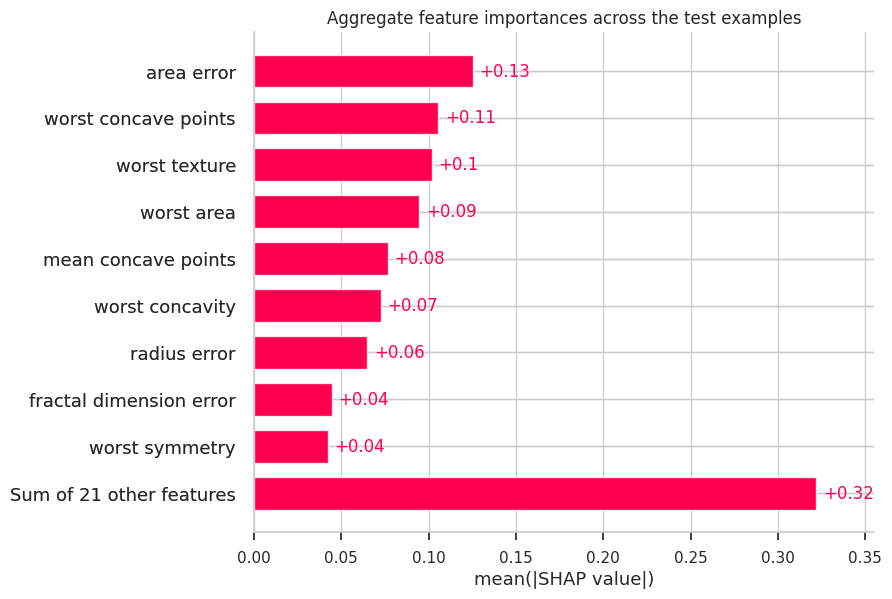

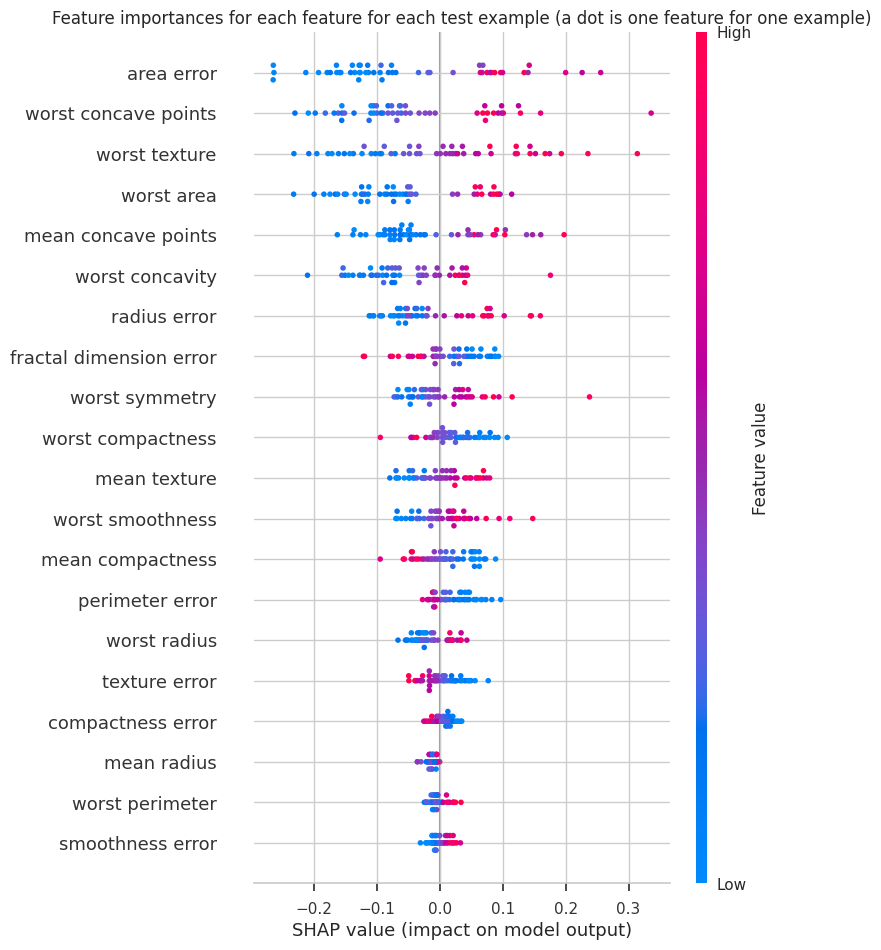

Now we analyze the strongest feature interactions of the most important feature, namely the feature "13".
CPU times: user 1min 12s, sys: 2.01 s, total: 1min 14s
Wall time: 1min 11s


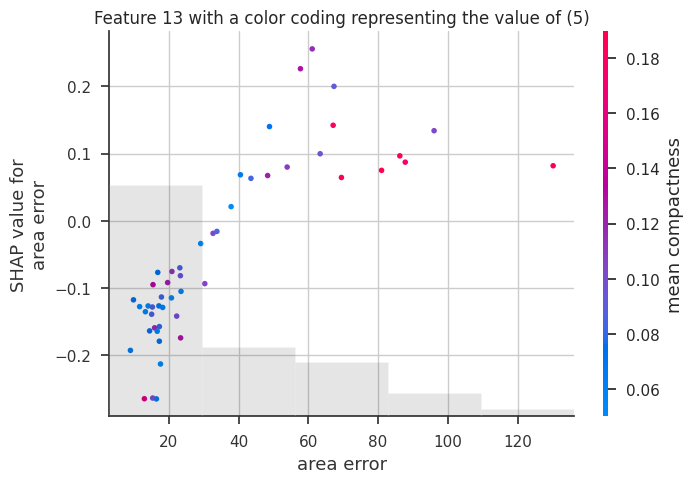

In [29]:
%%time
# With cuda: 1min 10s

from tabpfn_extensions import interpretability

# Load example dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
n_samples = 50

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Initialize and train model
clf = TabPFNClassifier(device='cuda', random_state=42)
clf.fit(X_train, y_train)

# Calculate SHAP values
shap_values = interpretability.shap.get_shap_values(
    estimator=clf,
    test_x=X_test[:n_samples],
    attribute_names=feature_names,
    algorithm="permutation", 
    device='cuda'
)

# Create visualization

print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

fig = interpretability.shap.plot_shap(shap_values)


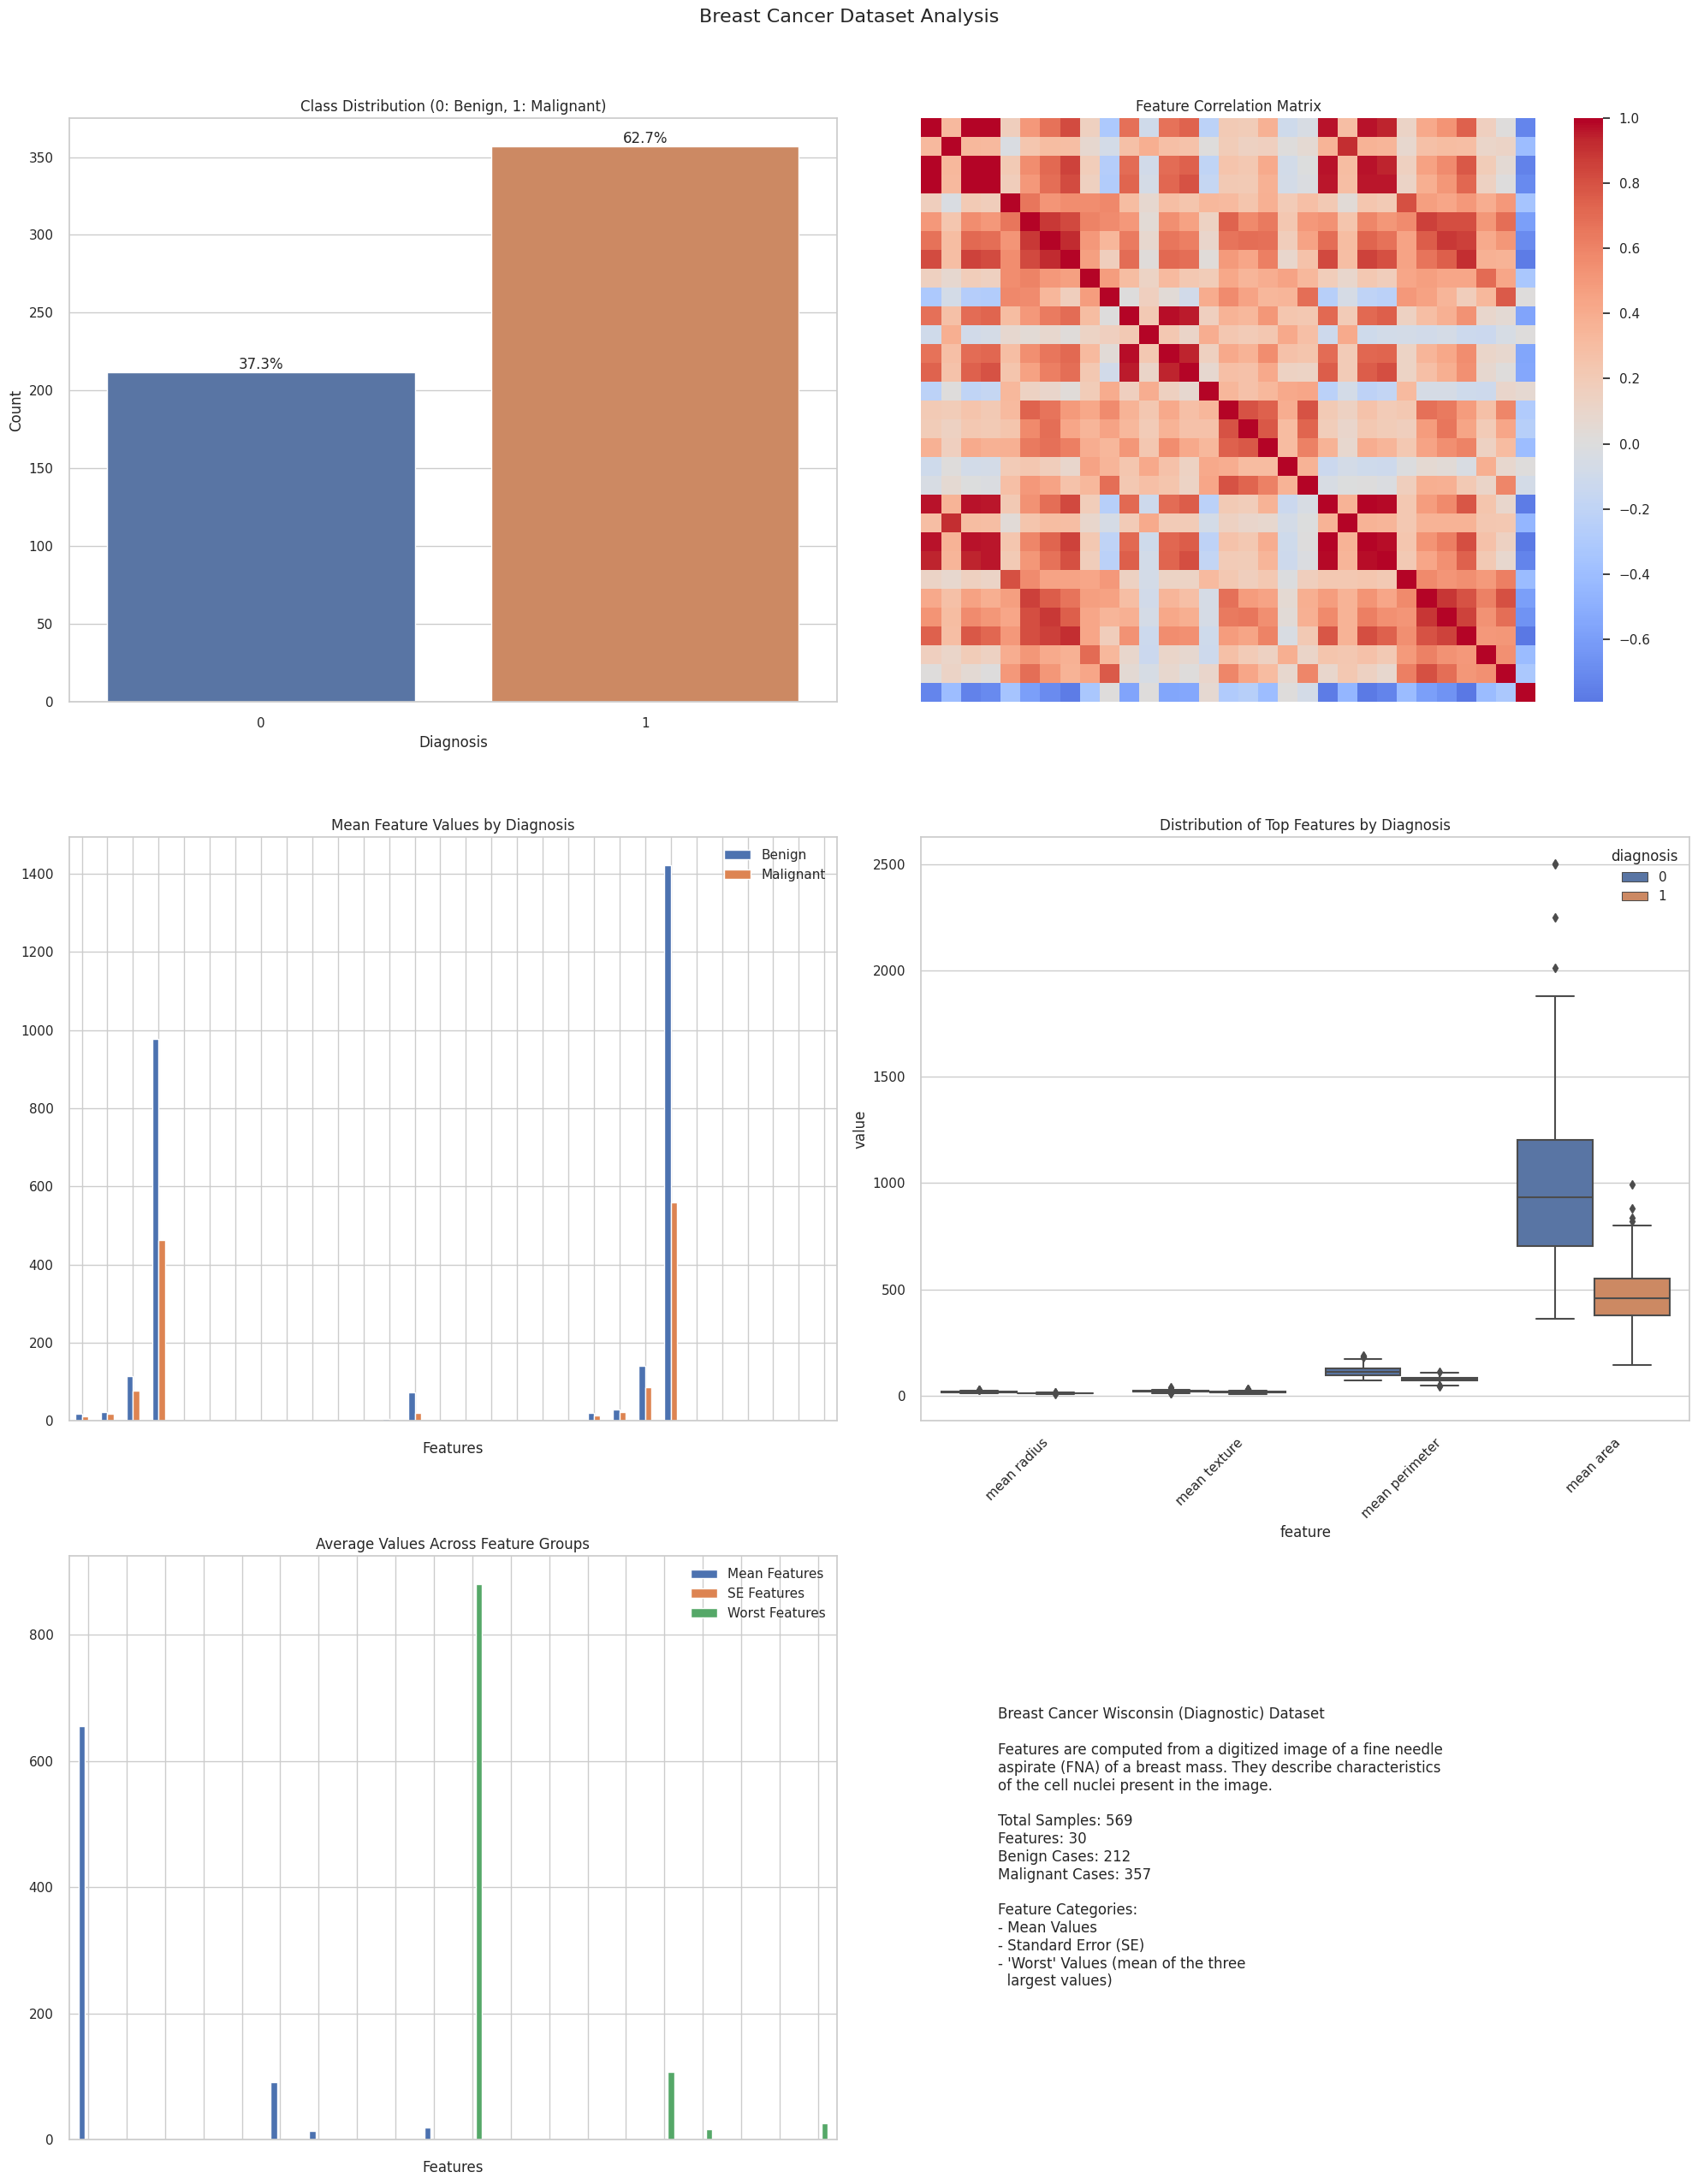


Breast Cancer Dataset Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius S

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Set seaborn style
sns.set_theme(style="whitegrid")

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Create DataFrame
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['diagnosis'] = y

# Create visualization grid
fig, axes = plt.subplots(3, 2, figsize=(20, 25))
fig.suptitle('Breast Cancer Dataset Analysis', fontsize=16, y=1.02)

# 1. Class Distribution
sns.countplot(data=df, x='diagnosis', ax=axes[0,0])
axes[0,0].set_title('Class Distribution (0: Benign, 1: Malignant)')
axes[0,0].set_xlabel('Diagnosis')
axes[0,0].set_ylabel('Count')

# Add percentage labels
total = len(df['diagnosis'])
for p in axes[0,0].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[0,0].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

# 2. Feature Correlations Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            xticklabels=False, yticklabels=False, ax=axes[0,1])
axes[0,1].set_title('Feature Correlation Matrix')

# 3. Mean Feature Values by Diagnosis
mean_features = df.groupby('diagnosis').mean()
mean_features.T.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Mean Feature Values by Diagnosis')
axes[1,0].set_xticklabels([])
axes[1,0].set_xlabel('Features')
axes[1,0].legend(['Benign', 'Malignant'])

# 4. Top Feature Distributions
top_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df_melt = df.melt(id_vars=['diagnosis'], 
                  value_vars=top_features,
                  var_name='feature', 
                  value_name='value')
sns.boxplot(data=df_melt, x='feature', y='value', hue='diagnosis', ax=axes[1,1])
axes[1,1].set_title('Distribution of Top Features by Diagnosis')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

# 5. Feature Groups Visualization
mean_features = [col for col in df.columns if 'mean' in col]
se_features = [col for col in df.columns if 'se' in col]
worst_features = [col for col in df.columns if 'worst' in col]

df_means = df[mean_features].mean()
df_se = df[se_features].mean()
df_worst = df[worst_features].mean()

feature_groups = pd.DataFrame({
    'Mean Features': df_means,
    'SE Features': df_se,
    'Worst Features': df_worst
})

feature_groups.plot(kind='bar', ax=axes[2,0])
axes[2,0].set_title('Average Values Across Feature Groups')
axes[2,0].set_xticklabels([])
axes[2,0].set_xlabel('Features')

# 6. Dataset Information
axes[2,1].axis('off')
info_text = (
    "Breast Cancer Wisconsin (Diagnostic) Dataset\n\n"
    "Features are computed from a digitized image of a fine needle\n"
    "aspirate (FNA) of a breast mass. They describe characteristics\n"
    "of the cell nuclei present in the image.\n\n"
    f"Total Samples: {len(df)}\n"
    f"Features: {len(breast_cancer.feature_names)}\n"
    f"Benign Cases: {len(df[df['diagnosis'] == 0])}\n"
    f"Malignant Cases: {len(df[df['diagnosis'] == 1])}\n\n"
    "Feature Categories:\n"
    "- Mean Values\n"
    "- Standard Error (SE)\n"
    "- 'Worst' Values (mean of the three\n  largest values)"
)
axes[2,1].text(0.1, 0.5, info_text, fontsize=12, va='center')

plt.tight_layout()
plt.show()

# Print detailed dataset information
print("\nBreast Cancer Dataset Description:")
print("=" * 80)
print(breast_cancer.DESCR)

print("\nFeature Categories:")
print("-" * 80)
print("\n1. Mean Values:")
for feature in mean_features:
    print(f"   - {feature}")
print("\n2. Standard Error Values:")
for feature in se_features:
    print(f"   - {feature}")
print("\n3. Worst Values:")
for feature in worst_features:
    print(f"   - {feature}")

print("\nFeature Statistics:")
print("-" * 80)
print(df.describe())

print("\nClass Distribution:")
print("-" * 80)
class_dist = df['diagnosis'].value_counts(normalize=True) * 100
print("Percentage of cases:")
print(f"Benign: {class_dist[0]:.1f}%")
print(f"Malignant: {class_dist[1]:.1f}%")

## Feature selection

In [31]:
%%time
from tabpfn_extensions import interpretability

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize model
clf = TabPFNClassifier(n_estimators=3, device='cuda', random_state=42)

# Feature selection
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=5,
    feature_names=feature_names,
    device='cuda'
)

# Print selected features
selected_features = [feature_names[i] for i in range(len(feature_names)) if sfs.get_support()[i]]
print("\nSelected features:")
for feature in selected_features:
    print(f"- {feature}")

Score with all features: 0.98067070330694 +/- 0.003493763869966795
Score with selected features: 0.98067070330694 +/- 0.008588584764482985
Features selected by forward sequential selection: ['area error', 'symmetry error', 'worst texture', 'worst perimeter', 'worst smoothness']

Selected features:
- area error
- symmetry error
- worst texture
- worst perimeter
- worst smoothness
CPU times: user 6min 45s, sys: 10.9 s, total: 6min 56s
Wall time: 2min 6s


# Unsupervised

## Data Generation / Outlier Detection

Data generation form breast cancer dataset
X.shape: (569, 30)
y.shape: (569,)
feature_names.shape: (30,)
Number of features: 30
Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Features selected: [4, 6, 12]
Names of features selected: ['mean smoothness' 'mean concavity' 'perimeter error']
Number of samples: 1138



100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


CPU times: user 9.12 s, sys: 408 ms, total: 9.53 s
Wall time: 4.57 s


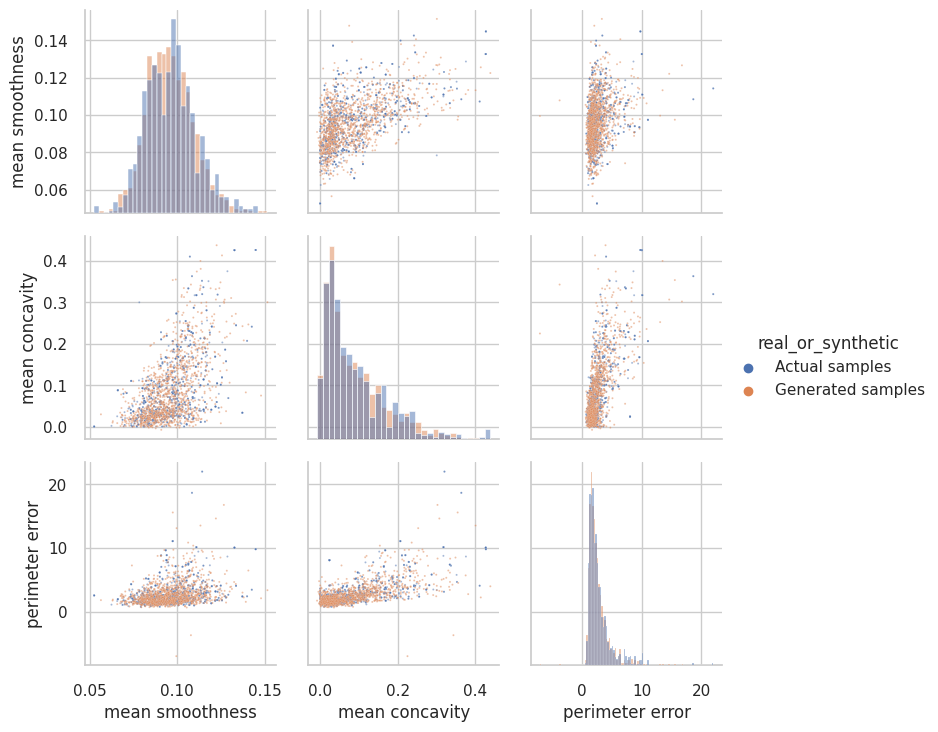

In [32]:
%%time

from tabpfn_extensions import unsupervised

# Load and prepare breast cancer dataset
df = load_breast_cancer(return_X_y=False)
X, y = df['data'], df['target']
feature_names = df['feature_names']

# Initialize TabPFN models
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=TabPFNClassifier(),
    tabpfn_reg=TabPFNRegressor()
)

# Select features for synthetic data generation
# Example features: [mean texture, mean area, mean concavity]
feature_indices = [4, 6, 12]

# Run synthetic data generation experiment
experiment = unsupervised.experiments.GenerateSyntheticDataExperiment(
    task_type='unsupervised'
)

# Print shapes of data
print('========\nData generation form breast cancer dataset\n========')
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')
print(f'feature_names.shape: {feature_names.shape}')    
# Generating synthetic data: 1min 10s   
# Print number of features and features names 
print(f'Number of features: {len(feature_names)}')
print(f'Features names: {feature_names}')
# Features selected: 
print(f'Features selected: {feature_indices}')
# Names of features selected: 
print(f'Names of features selected: {feature_names[feature_indices]}')
no_samples = X.shape[0] * 2
print(f'Number of samples: {no_samples}\n')

results = experiment.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=feature_names,
    temp=1.0,  # Temperature parameter for sampling
    n_samples=X.shape[0] * 2,  # Generate twice as many samples as original data
    indices=feature_indices
)

## Outlier detection

Breast cancer dataset

CPU times: user 4.85 s, sys: 2.57 s, total: 7.41 s
Wall time: 1.45 s


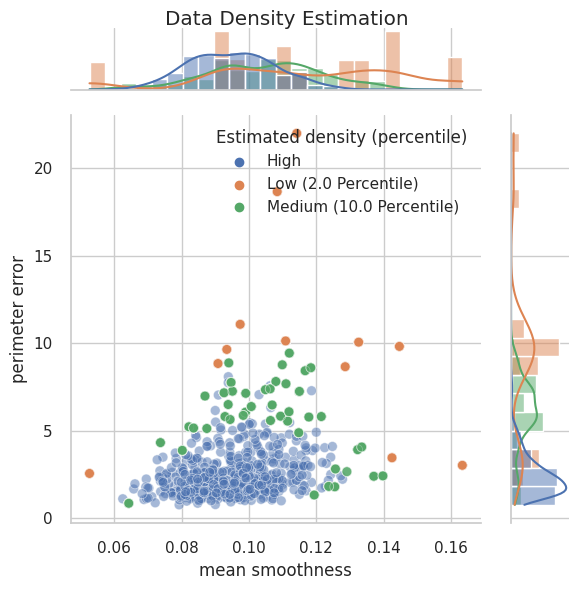

In [33]:
%%time

import torch
from sklearn.datasets import load_breast_cancer
from tabpfn_extensions import unsupervised
from tabpfn_extensions import TabPFNClassifier, TabPFNRegressor

# Load data
df = load_breast_cancer(return_X_y=False)
X, y = df["data"], df["target"]
attribute_names = df["feature_names"]

# Initialize models
clf = TabPFNClassifier(n_estimators=4)
reg = TabPFNRegressor(n_estimators=4)
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=clf, tabpfn_reg=reg
)

# Run outlier detection
exp_outlier = unsupervised.experiments.OutlierDetectionUnsupervisedExperiment(
    task_type="unsupervised"
)
results = exp_outlier.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=attribute_names,
    indices=[4, 12],  # Analyze features 4 and 12
)